# 2.4 data explore

<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Anisah Fitriana\AppData\Local\Temp\ipykernel_12832\2954788644.py:30: SyntaxWarning: invalid escape sequence '\d'
  df['Ram_GB'] = df['Ram'].str.extract('(\d+)').astype(int)



=== 2.4.1 DISTRIBUSI HARGA LAPTOP ===

Statistik Deskriptif Harga Laptop:
count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64


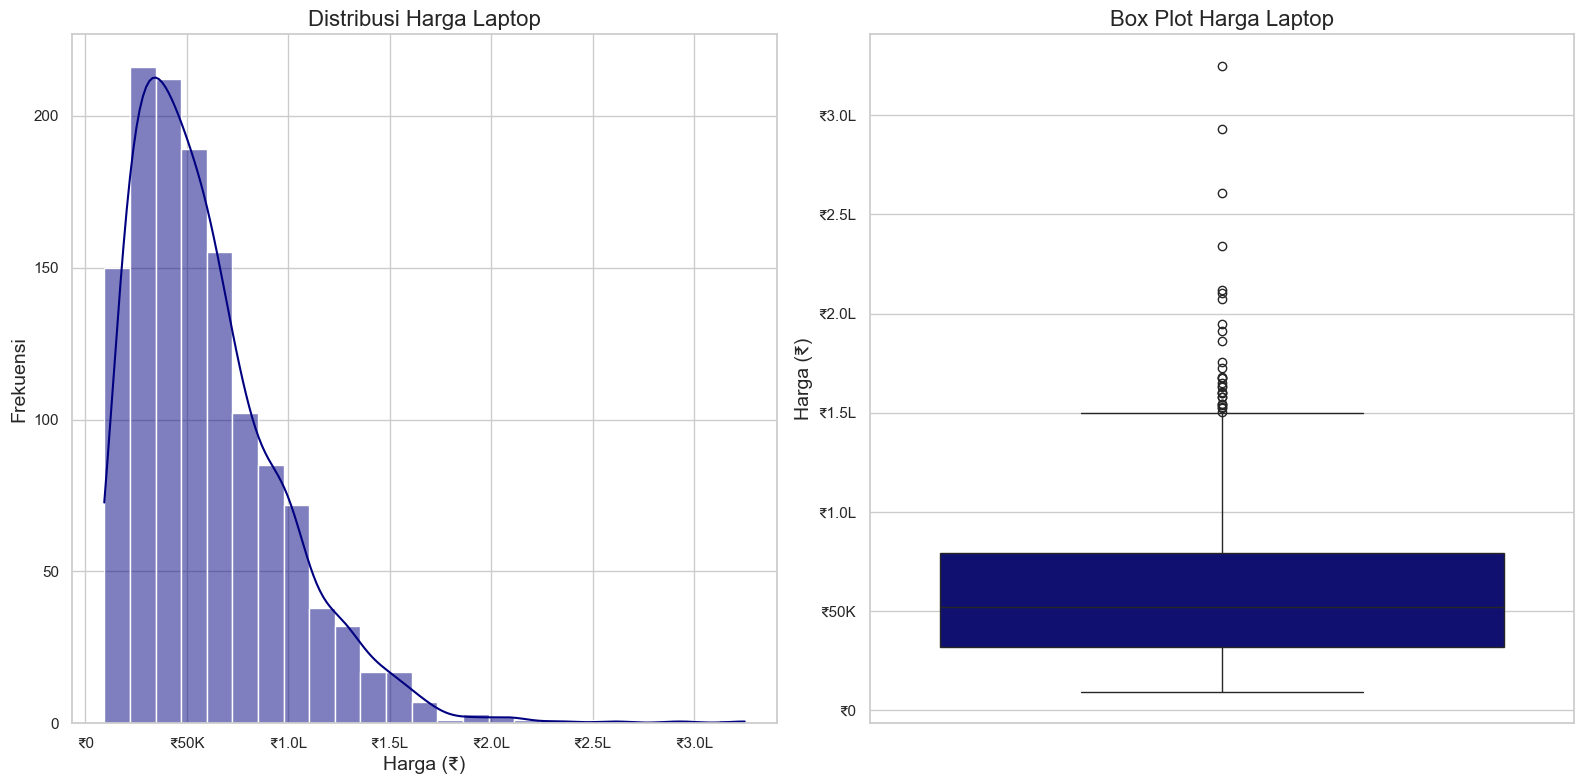


=== 2.4.2 ANALISIS KORELASI SPESIFIKASI DENGAN HARGA ===

Korelasi dengan Harga:
Price         1.000000
Ram_GB        0.743007
Has_SSD       0.513609
Storage_GB    0.156943
Inches        0.068197
Has_HDD      -0.169901
Name: Price, dtype: float64


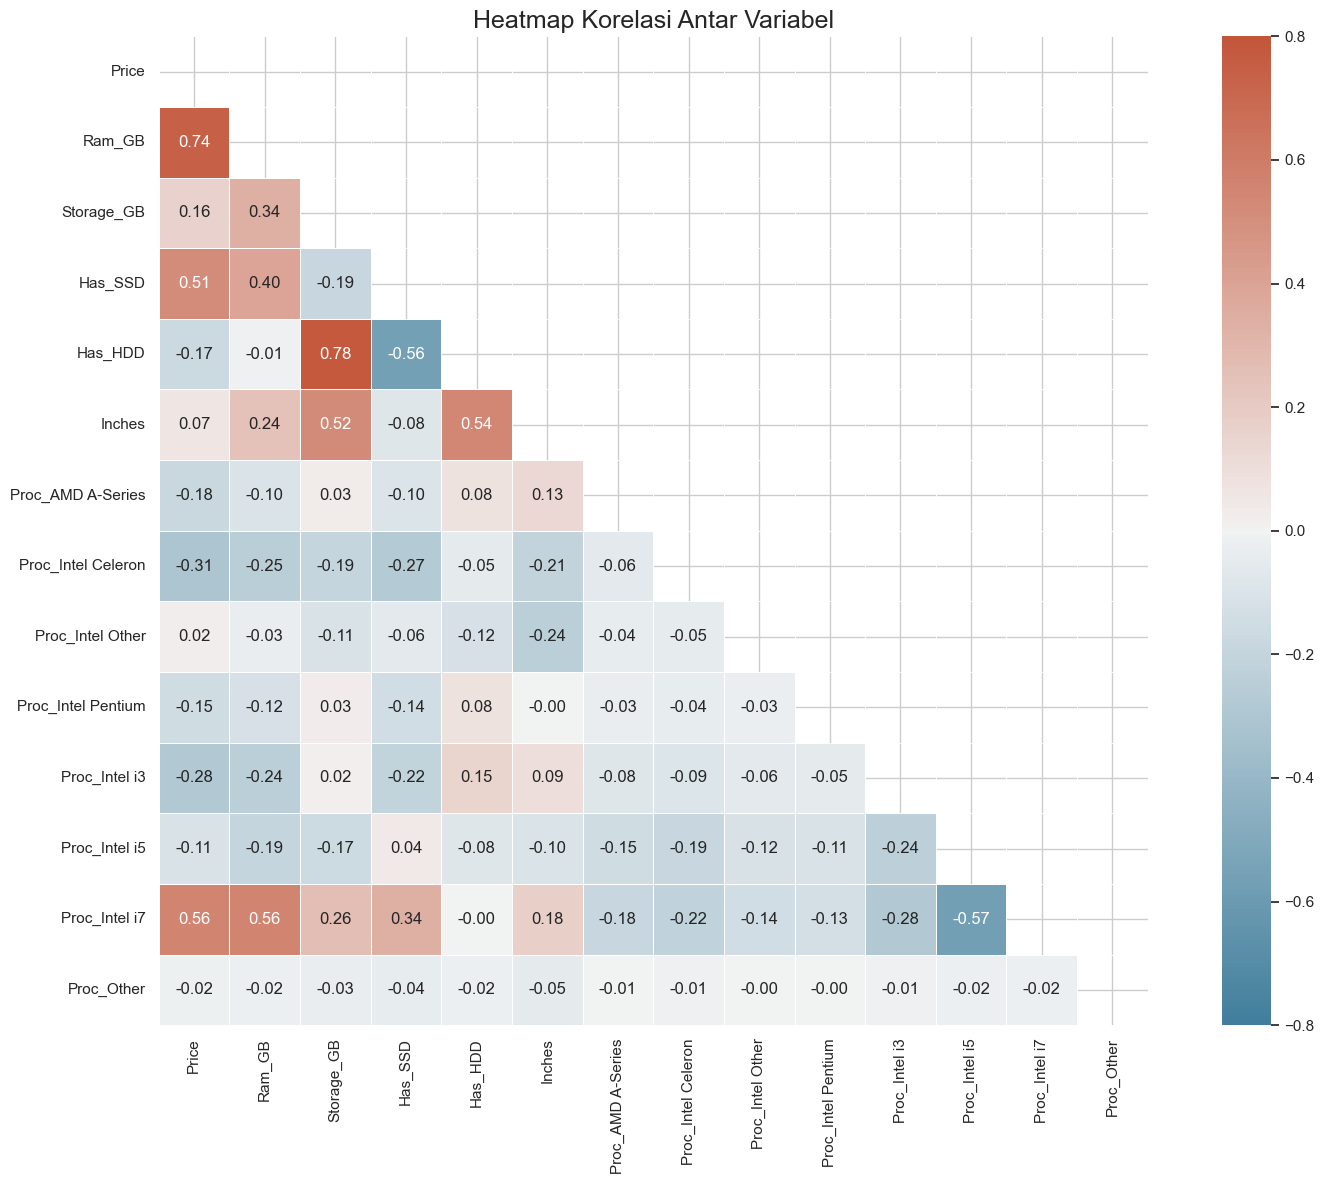


=== 2.4.3 DISTRIBUSI HARGA BERDASARKAN BRAND ===


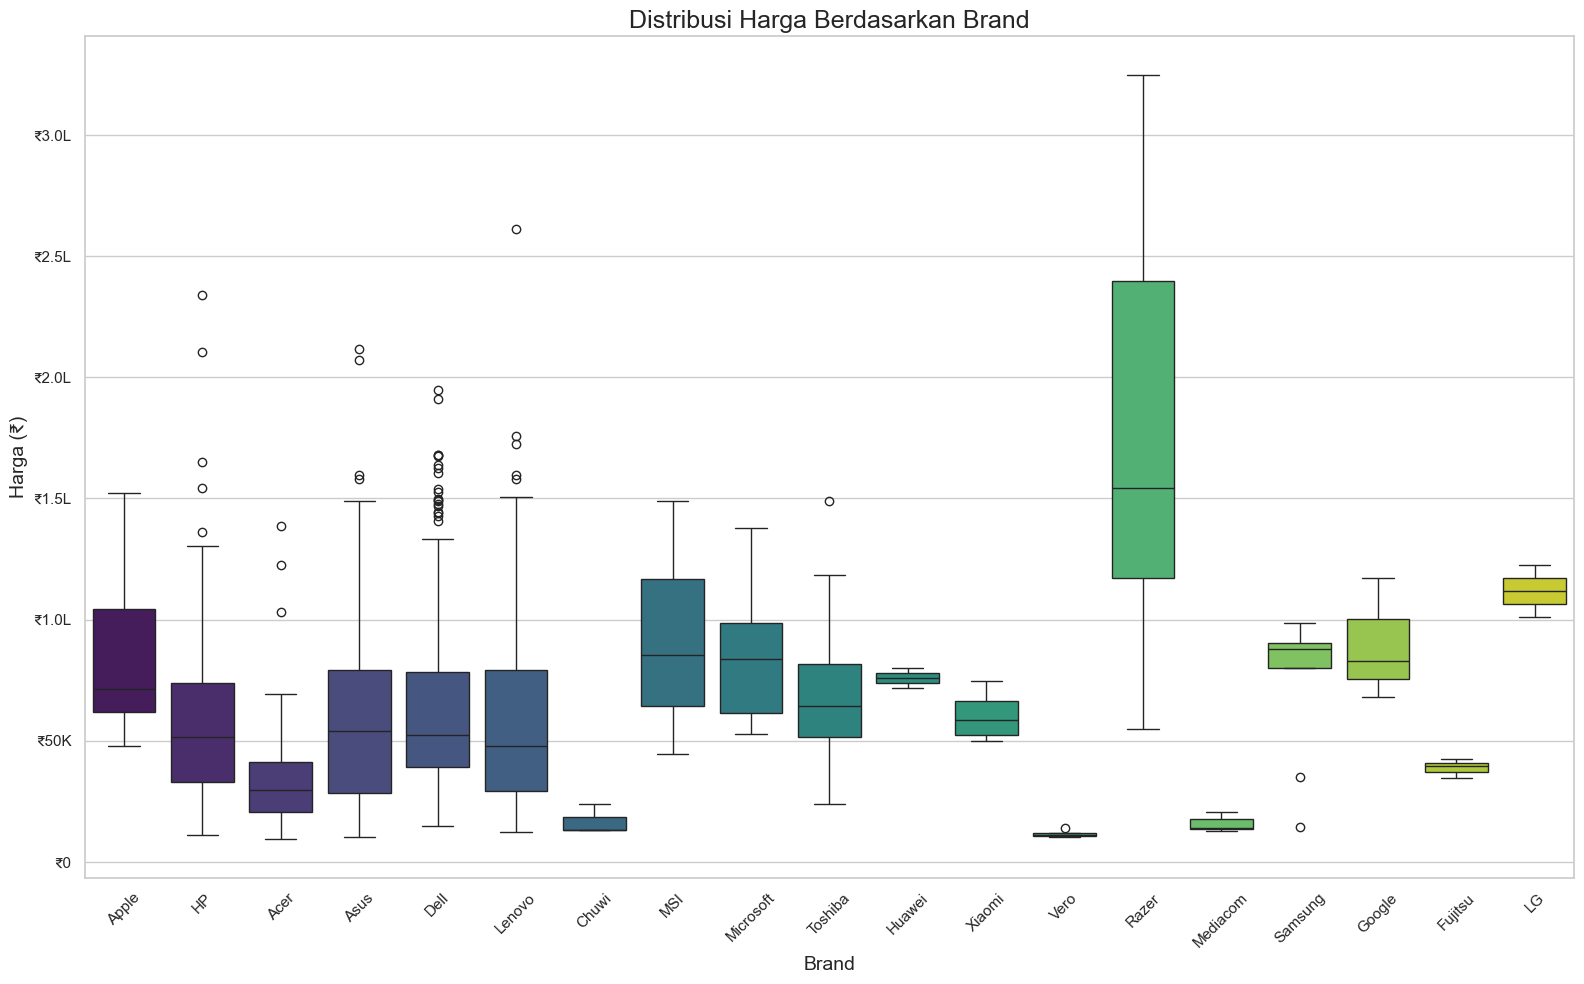


Rata-rata Harga per Brand:
Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64


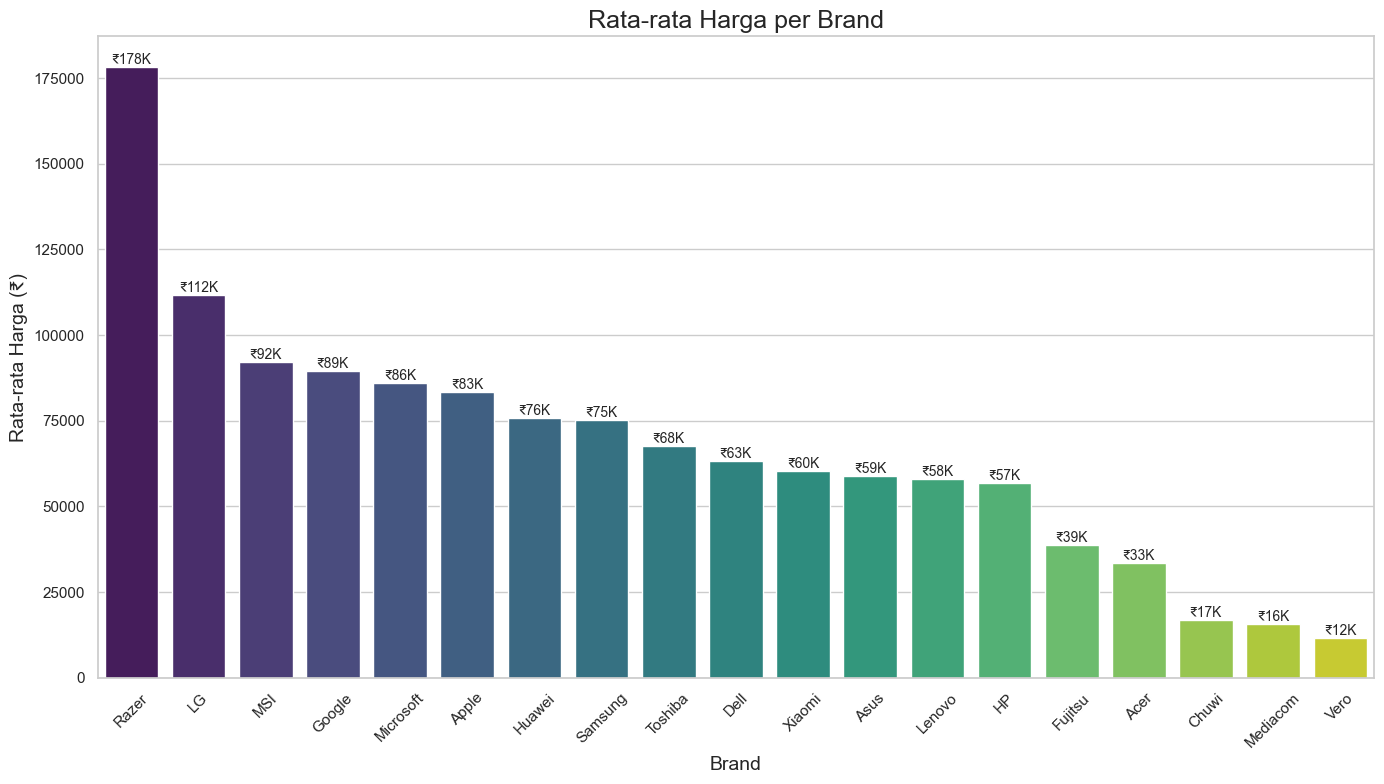


=== 2.4.4 PENGARUH RAM TERHADAP HARGA ===


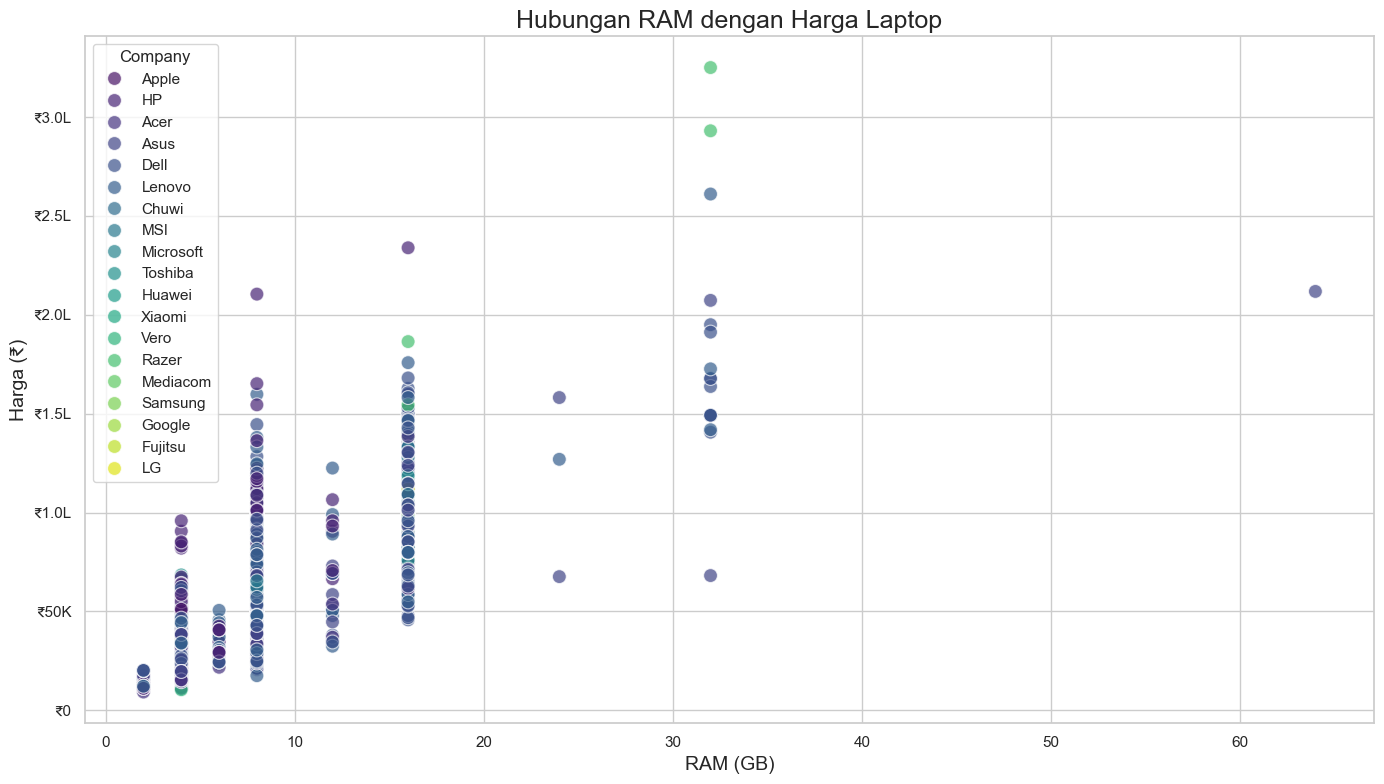


Statistik Harga Berdasarkan RAM:
                 mean       median  count
Ram_GB                                   
2        13552.857818   12467.5200     22
4        30613.221734   26533.4400    375
6        32778.193873   30849.1200     41
8        62913.713455   58554.7200    619
12       66037.277952   66546.7200     25
16      103191.166872  100725.8400    200
24      117553.440000  126912.9600      3
32      181849.215812  167691.8736     17
64      211788.000000  211788.0000      1


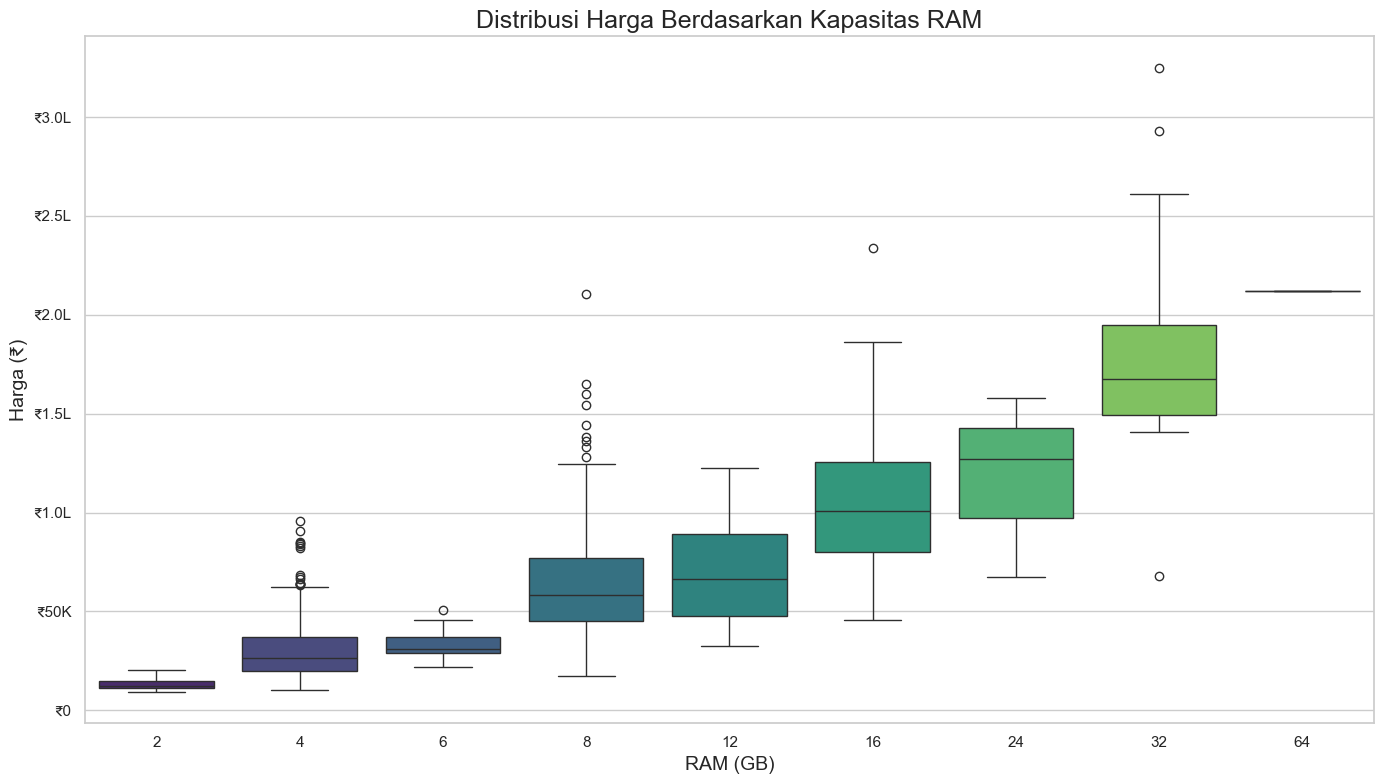


=== 2.4.5 PENGARUH STORAGE TERHADAP HARGA ===

Statistik Harga Berdasarkan Tipe Storage:
                      mean    median  count
Storage_Type                               
SSD + HDD     85964.959656  74458.80    200
SSD Only      70271.441110  63776.16    643
HDD Only      35103.819906  31861.44    376
Other         28977.393600  18594.72     84


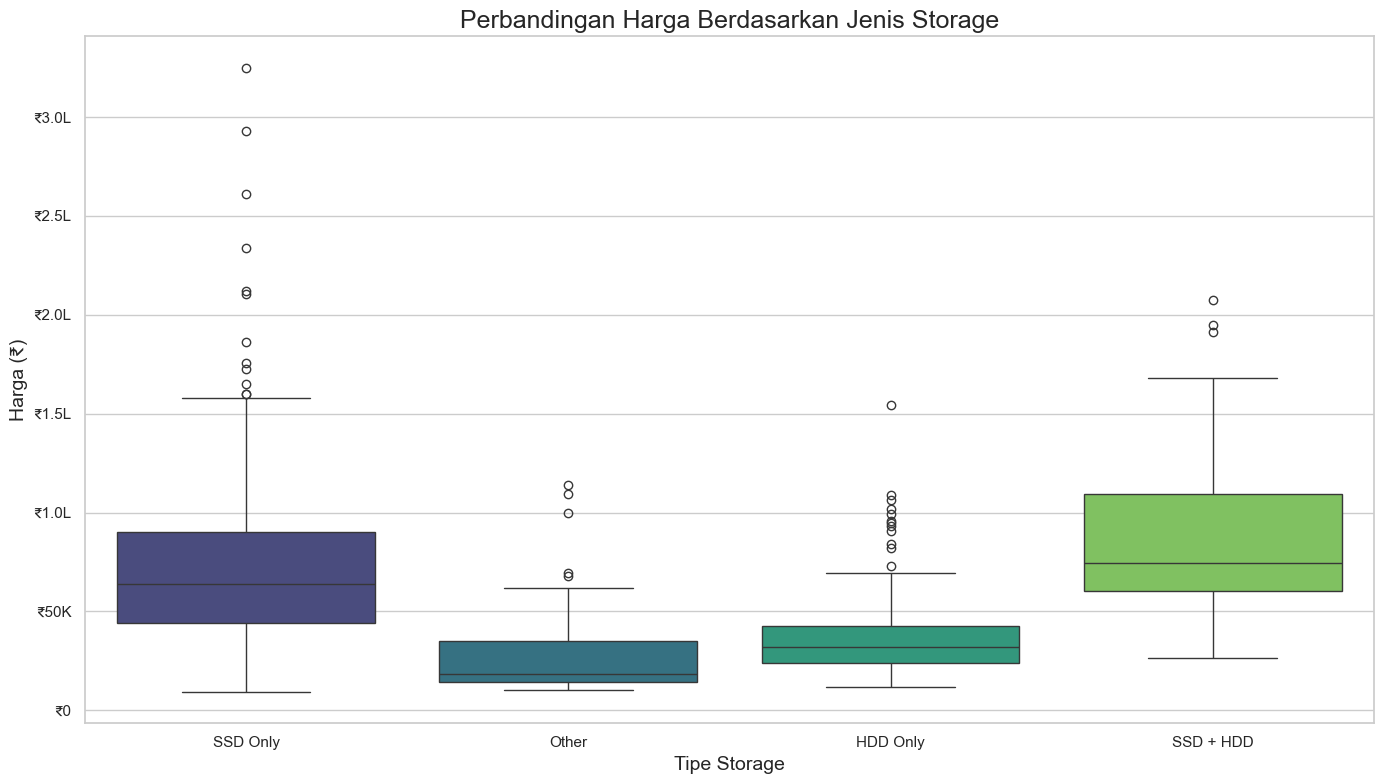

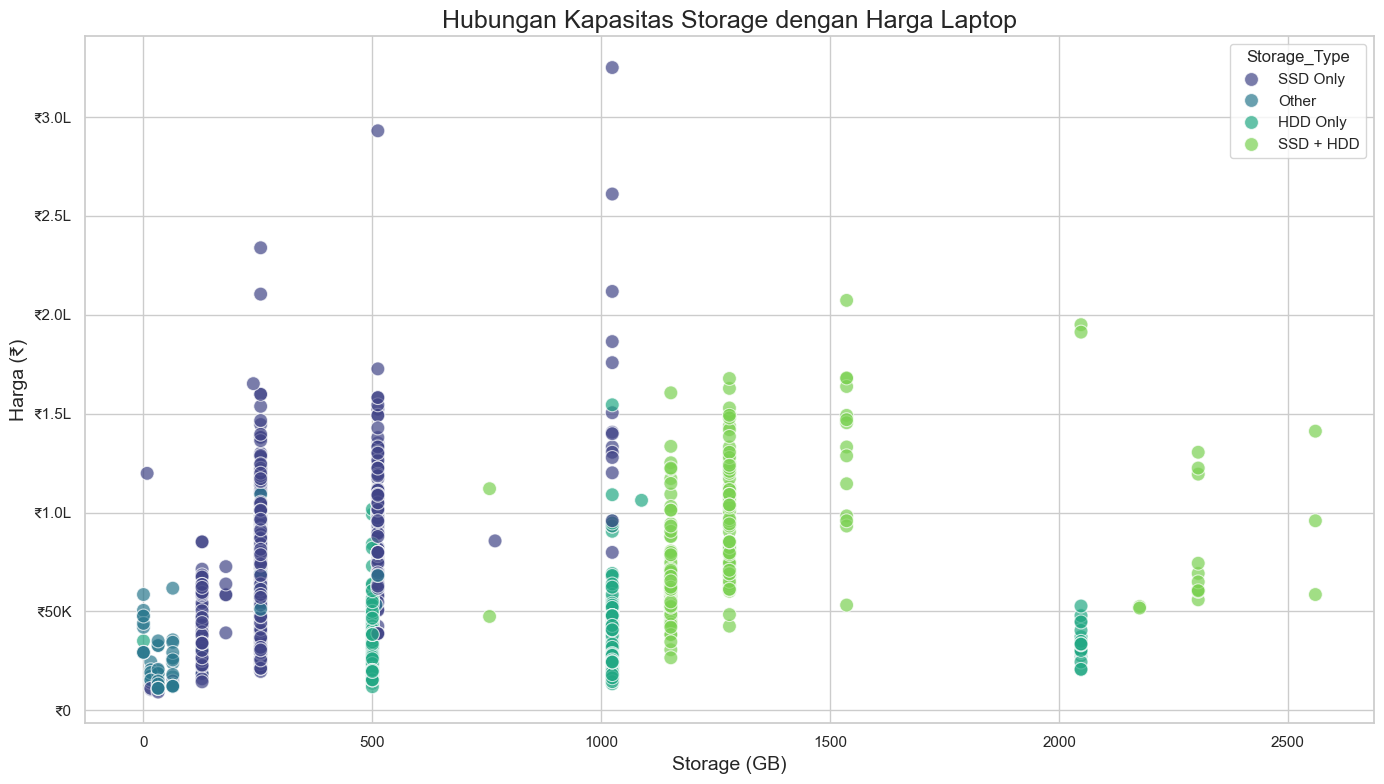


=== 2.4.6 PENGARUH PROCESSOR TERHADAP HARGA ===

Rata-rata Harga Berdasarkan Tipe Processor:
Processor_Type
Intel i7         85023.110883
Intel Other      64513.584800
Intel i5         54080.012426
Other            35111.520000
AMD A-Series     29870.839045
Intel i3         28857.830929
Intel Pentium    23205.571200
Intel Celeron    17013.823691
Name: Price, dtype: float64


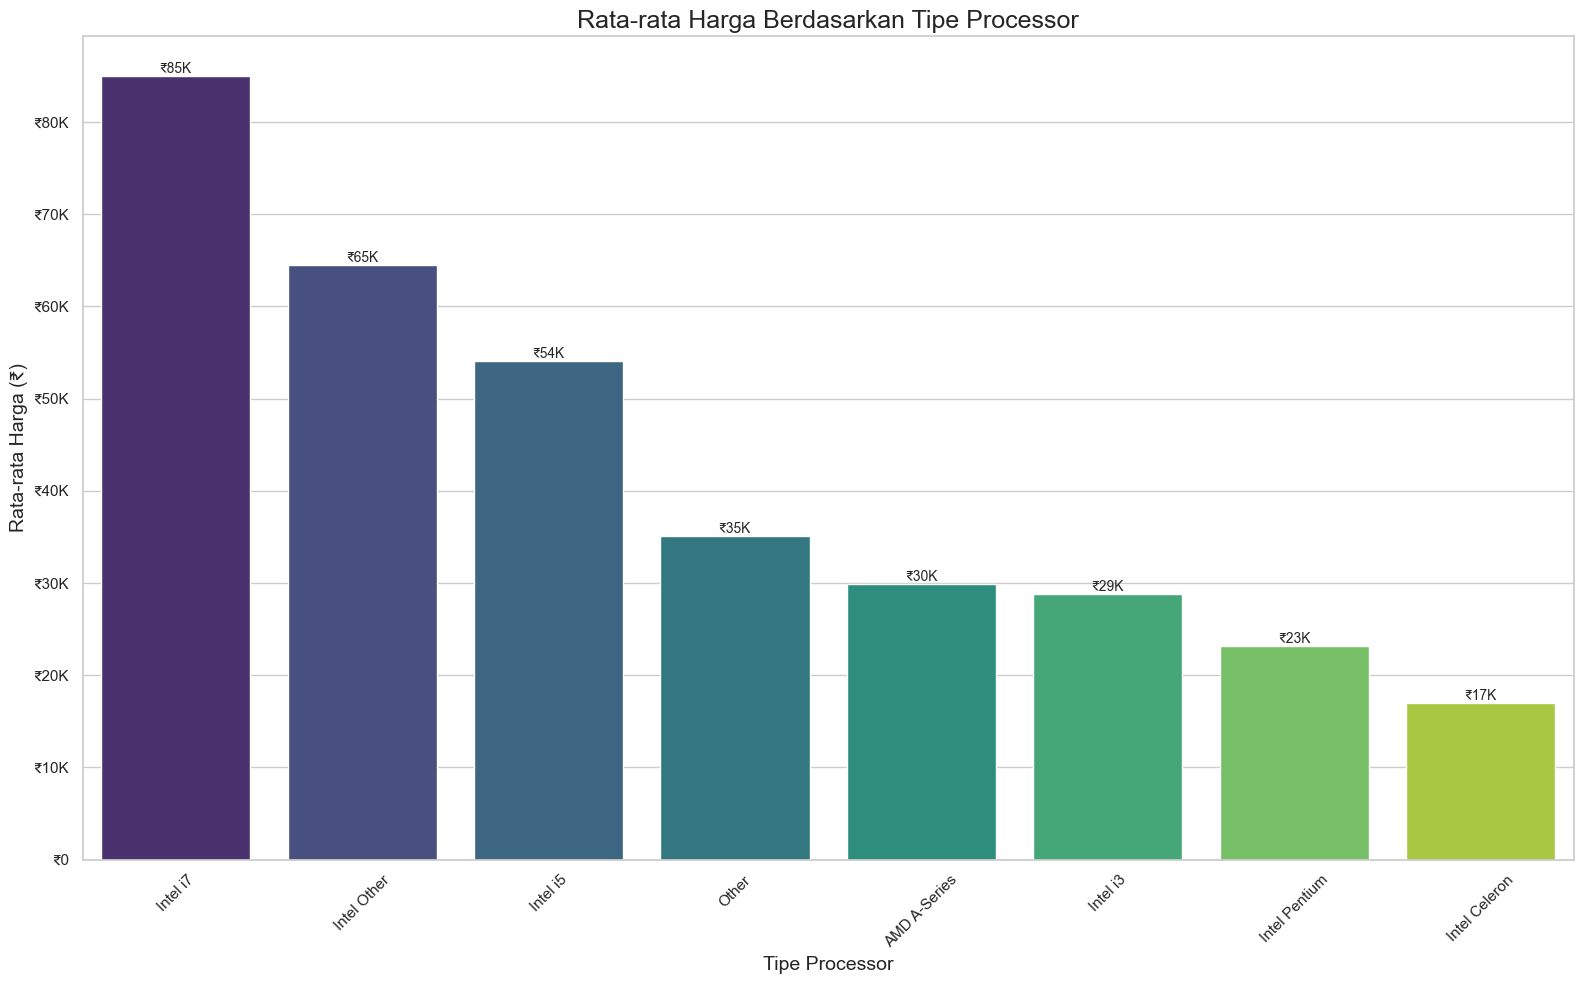


Perbandingan Harga Berdasarkan Brand Processor:
Processor_Brand
Intel    61389.969654
Other    35111.520000
AMD      29870.839045
Name: Price, dtype: float64


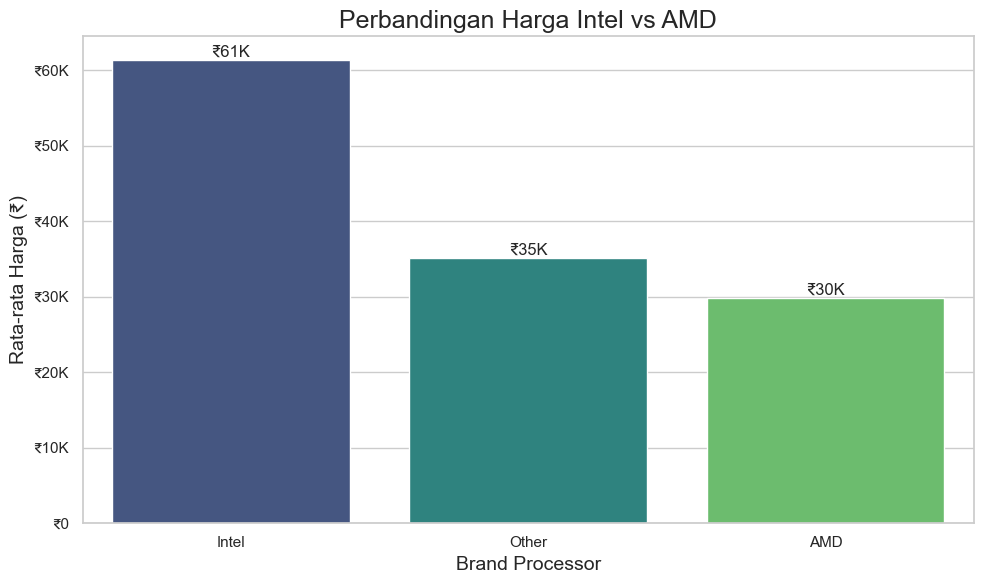


=== 2.4.7 PENGARUH GPU TERHADAP HARGA ===

Statistik Harga Berdasarkan Kategori GPU:
                        mean    median  count
GPU_Category                                 
Dedicated GPU   63834.251728  53200.08    548
Integrated GPU  56992.709887  50349.60    755


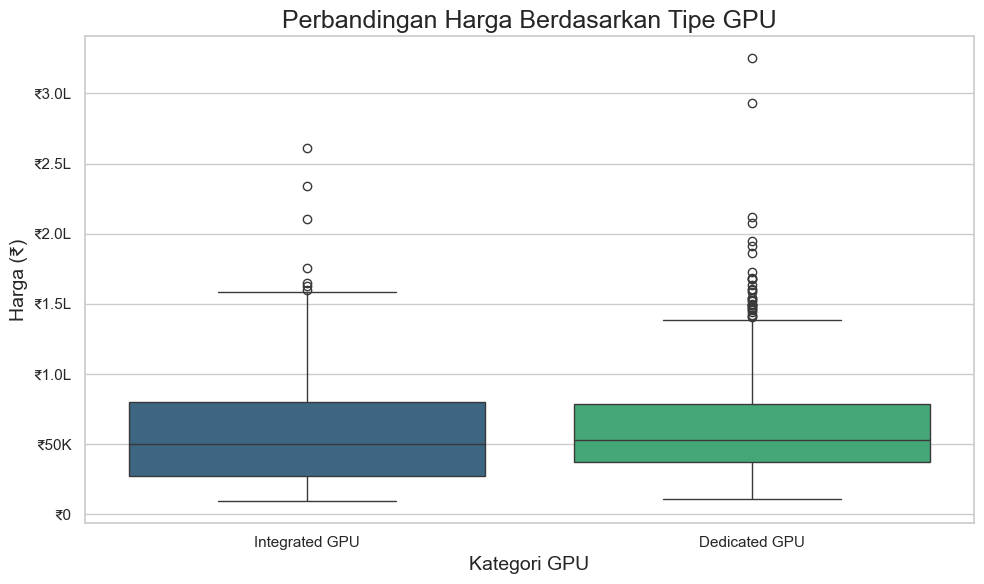


Rata-rata Harga Berdasarkan Tipe GPU:
GPU_Type
Other GPU           128633.726400
NVIDIA GTX           88174.609956
Intel Integrated     53718.258994
NVIDIA Other         50437.241502
AMD GPU              41326.507680
Name: Price, dtype: float64


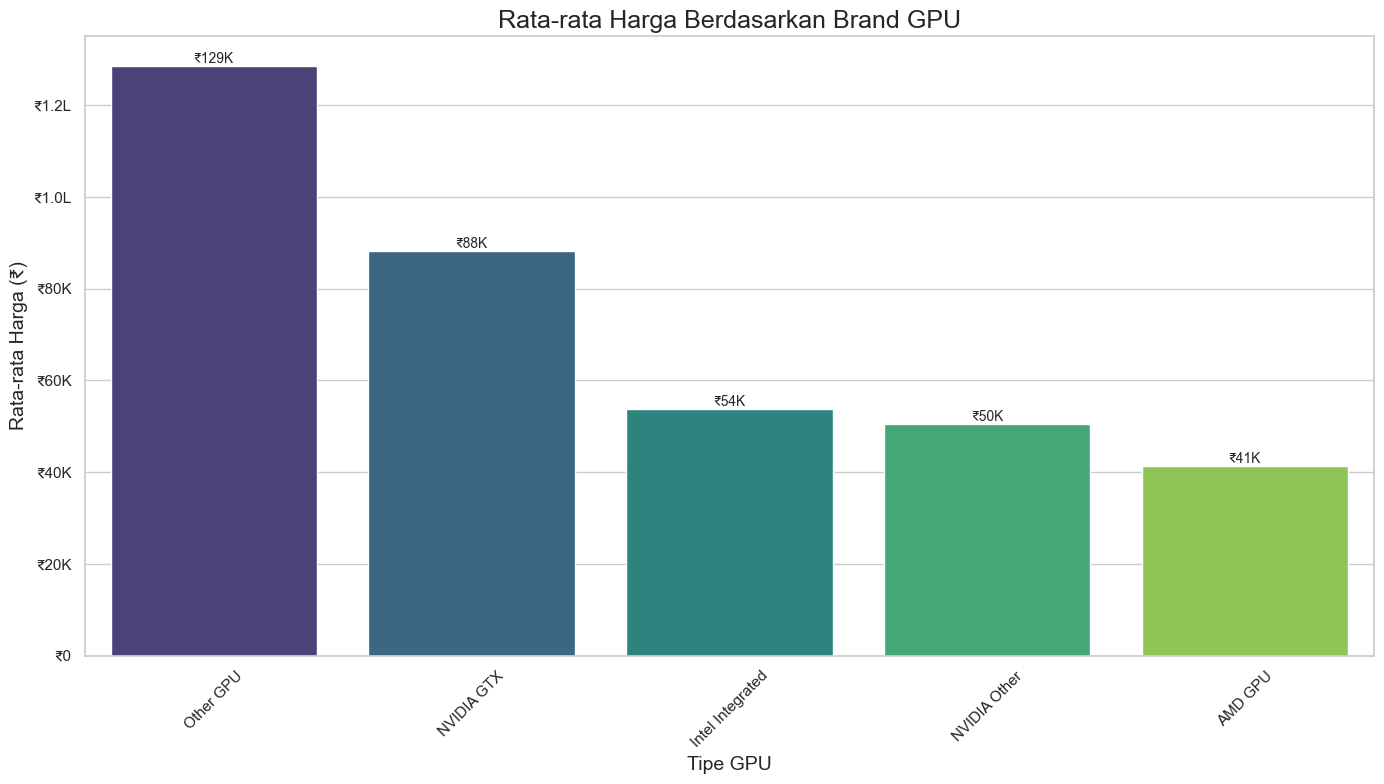


Dataframe yang sudah diproses telah disimpan sebagai 'preprocessed_laptop_data.csv'


In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# load dataset
df = pd.read_csv('laptop_data.csv')

# Fungsi formatter harga untuk mata uang Rupee India
def price_formatter(x, pos):
    if x >= 100000:
        return f'₹{x/100000:.1f}L'  # Format Lakh untuk harga tinggi
    elif x >= 1000:
        return f'₹{x/1000:.0f}K'
    else:
        return f'₹{x:.0f}'

# === Preprocessing Dasar ===
# Ekstrak nilai numerik dari kolom RAM (8GB -> 8)
df['Ram_GB'] = df['Ram'].str.extract('(\d+)').astype(int)

# Fungsi untuk ekstrak total kapasitas storage dalam GB
def extract_storage_size(text):
    total_gb = 0
    if isinstance(text, str):
        import re
        sizes = re.findall(r'(\d+)(?:\s*)(GB|TB)', text)
        for size, unit in sizes:
            if unit == 'TB':
                total_gb += int(size) * 1024  # 1 TB = 1024 GB
            else:
                total_gb += int(size)
    return total_gb

# Cek apakah memiliki SSD
def has_ssd(text):
    return 1 if isinstance(text, str) and 'SSD' in text else 0

# Cek apakah memiliki HDD
def has_hdd(text):
    return 1 if isinstance(text, str) and 'HDD' in text else 0

df['Storage_GB'] = df['Memory'].apply(extract_storage_size)
df['Has_SSD'] = df['Memory'].apply(has_ssd)
df['Has_HDD'] = df['Memory'].apply(has_hdd)

# Ekstrak informasi dari Cpu
def get_processor_type(text):
    if isinstance(text, str):
        if 'Intel' in text:
            if 'i9' in text:
                return 'Intel i9'
            elif 'i7' in text:
                return 'Intel i7'
            elif 'i5' in text:
                return 'Intel i5'
            elif 'i3' in text:
                return 'Intel i3'
            elif 'Celeron' in text:
                return 'Intel Celeron'
            elif 'Pentium' in text:
                return 'Intel Pentium'
            else:
                return 'Intel Other'
        elif 'AMD' in text:
            if 'Ryzen 9' in text or 'R9' in text:
                return 'AMD Ryzen 9'
            elif 'Ryzen 7' in text or 'R7' in text:
                return 'AMD Ryzen 7'
            elif 'Ryzen 5' in text or 'R5' in text:
                return 'AMD Ryzen 5'
            elif 'Ryzen 3' in text or 'R3' in text:
                return 'AMD Ryzen 3'
            elif 'A' in text:
                return 'AMD A-Series'
            else:
                return 'AMD Other'
        else:
            return 'Other'
    return 'Unknown'

df['Processor_Type'] = df['Cpu'].apply(get_processor_type)

# Kategori GPU
def get_gpu_type(text):
    if isinstance(text, str):
        if 'NVIDIA' in text or 'GeForce' in text:
            if 'RTX' in text:
                return 'NVIDIA RTX'
            elif 'GTX' in text:
                return 'NVIDIA GTX'
            else:
                return 'NVIDIA Other'
        elif 'AMD' in text or 'Radeon' in text:
            return 'AMD GPU'
        elif 'Intel' in text:
            return 'Intel Integrated'
        else:
            return 'Other GPU'
    return 'Unknown'

df['GPU_Type'] = df['Gpu'].apply(get_gpu_type)

# Kategori Storage
def get_storage_type(row):
    if row['Has_SSD'] == 1 and row['Has_HDD'] == 1:
        return 'SSD + HDD'
    elif row['Has_SSD'] == 1:
        return 'SSD Only'
    elif row['Has_HDD'] == 1:
        return 'HDD Only'
    else:
        return 'Other'

df['Storage_Type'] = df.apply(get_storage_type, axis=1)

# Kategori dedicated vs integrated GPU
def is_dedicated_gpu(text):
    if isinstance(text, str):
        if 'NVIDIA' in text or 'GeForce' in text or 'AMD' in text or 'Radeon' in text:
            return 'Dedicated GPU'
        else:
            return 'Integrated GPU'
    return 'Unknown'

df['GPU_Category'] = df['Gpu'].apply(is_dedicated_gpu)

# Kategori processor brand
def get_processor_brand(text):
    if isinstance(text, str):
        if 'Intel' in text:
            return 'Intel'
        elif 'AMD' in text:
            return 'AMD'
        else:
            return 'Other'
    return 'Unknown'

df['Processor_Brand'] = df['Cpu'].apply(get_processor_brand)

# === 2.4.1 Distribusi Harga Laptop ===
print("\n=== 2.4.1 DISTRIBUSI HARGA LAPTOP ===")

# Statistik deskriptif harga
price_stats = df['Price'].describe()
print("\nStatistik Deskriptif Harga Laptop:")
print(price_stats)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='navy', bins=25)
plt.title('Distribusi Harga Laptop', fontsize=16)
plt.xlabel('Harga (₹)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'], color='navy')
plt.title('Box Plot Harga Laptop', fontsize=16)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.tight_layout()
plt.savefig('distribusi_harga.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2.4.2 Analisis Korelasi Spesifikasi dengan Harga ===
print("\n=== 2.4.2 ANALISIS KORELASI SPESIFIKASI DENGAN HARGA ===")

# Pilih kolom numerik untuk korelasi
numeric_cols = ['Price', 'Ram_GB', 'Storage_GB', 'Has_SSD', 'Has_HDD', 'Inches']

# Hitung korelasi dengan Price
correlations = df[numeric_cols].corr()['Price'].sort_values(ascending=False)
print("\nKorelasi dengan Harga:")
print(correlations)

# Tambahkan dummy variables untuk kategorikal
processor_dummies = pd.get_dummies(df['Processor_Type'], prefix='Proc')
df_corr = pd.concat([df[numeric_cols], processor_dummies], axis=1)

# Hitung korelasi
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel', fontsize=18)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2.4.3 Distribusi Harga Berdasarkan Brand ===
print("\n=== 2.4.3 DISTRIBUSI HARGA BERDASARKAN BRAND ===")

# Box plot harga per brand
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='Company', y='Price', data=df, palette='viridis')
plt.title('Distribusi Harga Berdasarkan Brand', fontsize=18)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))
plt.tight_layout()
plt.savefig('harga_per_brand.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar chart rata-rata harga per brand
plt.figure(figsize=(14, 8))
brand_price = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
print("\nRata-rata Harga per Brand:")
print(brand_price)

ax = sns.barplot(x=brand_price.index, y=brand_price.values, palette='viridis')
plt.title('Rata-rata Harga per Brand', fontsize=18)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Rata-rata Harga (₹)', fontsize=14)
plt.xticks(rotation=45)

# Tambahkan label harga pada bar chart
for i, p in enumerate(ax.patches):
    ax.annotate(f'₹{p.get_height()/1000:.0f}K',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.savefig('avg_price_per_brand.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2.4.4 Pengaruh RAM Terhadap Harga ===
print("\n=== 2.4.4 PENGARUH RAM TERHADAP HARGA ===")

# Scatter plot RAM vs Harga
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Ram_GB', y='Price', data=df, hue='Company', palette='viridis', s=100, alpha=0.7)
plt.title('Hubungan RAM dengan Harga Laptop', fontsize=18)
plt.xlabel('RAM (GB)', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))
plt.tight_layout()
plt.savefig('ram_vs_harga.png', dpi=300, bbox_inches='tight')
plt.show()

# Box plot harga berdasarkan kapasitas RAM
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Ram_GB', y='Price', data=df, palette='viridis')
plt.title('Distribusi Harga Berdasarkan Kapasitas RAM', fontsize=18)
plt.xlabel('RAM (GB)', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

# Statistik harga berdasarkan RAM
ram_stats = df.groupby('Ram_GB')['Price'].agg(['mean', 'median', 'count']).sort_index()
print("\nStatistik Harga Berdasarkan RAM:")
print(ram_stats)

plt.tight_layout()
plt.savefig('boxplot_ram.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2.4.5 Pengaruh Storage Terhadap Harga ===
print("\n=== 2.4.5 PENGARUH STORAGE TERHADAP HARGA ===")

# Perbandingan harga berdasarkan jenis storage
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Storage_Type', y='Price', data=df, palette='viridis')
plt.title('Perbandingan Harga Berdasarkan Jenis Storage', fontsize=18)
plt.xlabel('Tipe Storage', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

# Statistik harga berdasarkan tipe storage
storage_stats = df.groupby('Storage_Type')['Price'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print("\nStatistik Harga Berdasarkan Tipe Storage:")
print(storage_stats)

plt.tight_layout()
plt.savefig('storage_type_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatter plot kapasitas storage vs harga
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Storage_GB', y='Price', data=df, hue='Storage_Type', palette='viridis', s=100, alpha=0.7)
plt.title('Hubungan Kapasitas Storage dengan Harga Laptop', fontsize=18)
plt.xlabel('Storage (GB)', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))
plt.tight_layout()
plt.savefig('storage_capacity_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2.4.6 Pengaruh Processor Terhadap Harga ===
print("\n=== 2.4.6 PENGARUH PROCESSOR TERHADAP HARGA ===")

# Bar chart rata-rata harga berdasarkan tipe processor
plt.figure(figsize=(16, 10))
proc_price = df.groupby('Processor_Type')['Price'].mean().sort_values(ascending=False)
print("\nRata-rata Harga Berdasarkan Tipe Processor:")
print(proc_price)

ax = sns.barplot(x=proc_price.index, y=proc_price.values, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Tipe Processor', fontsize=18)
plt.xlabel('Tipe Processor', fontsize=14)
plt.ylabel('Rata-rata Harga (₹)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

# Tambahkan label harga pada bar chart
for i, p in enumerate(ax.patches):
    ax.annotate(f'₹{p.get_height()/1000:.0f}K',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.savefig('processor_price_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Perbandingan Intel vs AMD
plt.figure(figsize=(10, 6))
brand_price = df.groupby('Processor_Brand')['Price'].mean().sort_values(ascending=False)
print("\nPerbandingan Harga Berdasarkan Brand Processor:")
print(brand_price)

ax = sns.barplot(x=brand_price.index, y=brand_price.values, palette='viridis')
plt.title('Perbandingan Harga Intel vs AMD', fontsize=18)
plt.xlabel('Brand Processor', fontsize=14)
plt.ylabel('Rata-rata Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

# Tambahkan label harga pada bar chart
for i, p in enumerate(ax.patches):
    if p.get_height() > 0:  # Mencegah error jika tidak ada data
        ax.annotate(f'₹{p.get_height()/1000:.0f}K',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'bottom', fontsize=12, rotation=0)

plt.tight_layout()
plt.savefig('intel_vs_amd.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2.4.7 Pengaruh GPU Terhadap Harga ===
print("\n=== 2.4.7 PENGARUH GPU TERHADAP HARGA ===")

# Perbandingan harga berdasarkan tipe GPU (dedicated vs integrated)
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='GPU_Category', y='Price', data=df, palette='viridis')
plt.title('Perbandingan Harga Berdasarkan Tipe GPU', fontsize=18)
plt.xlabel('Kategori GPU', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

# Statistik harga berdasarkan kategori GPU
gpu_cat_stats = df.groupby('GPU_Category')['Price'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print("\nStatistik Harga Berdasarkan Kategori GPU:")
print(gpu_cat_stats)

plt.tight_layout()
plt.savefig('gpu_type_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar chart rata-rata harga berdasarkan brand GPU
plt.figure(figsize=(14, 8))
gpu_price = df.groupby('GPU_Type')['Price'].mean().sort_values(ascending=False)
print("\nRata-rata Harga Berdasarkan Tipe GPU:")
print(gpu_price)

ax = sns.barplot(x=gpu_price.index, y=gpu_price.values, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Brand GPU', fontsize=18)
plt.xlabel('Tipe GPU', fontsize=14)
plt.ylabel('Rata-rata Harga (₹)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

# Tambahkan label harga pada bar chart
for i, p in enumerate(ax.patches):
    if p.get_height() > 0:  # Mencegah error jika tidak ada data
        ax.annotate(f'₹{p.get_height()/1000:.0f}K',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.savefig('gpu_brand_price.png', dpi=300, bbox_inches='tight')
plt.show()

# Simpan dataframe yang sudah diproses untuk modeling
df.to_csv('preprocessed_laptop_data.csv', index=False)
print("\nDataframe yang sudah diproses telah disimpan sebagai 'preprocessed_laptop_data.csv'")

# 2.5 Data Preparation

2.5.1 Handling outlier

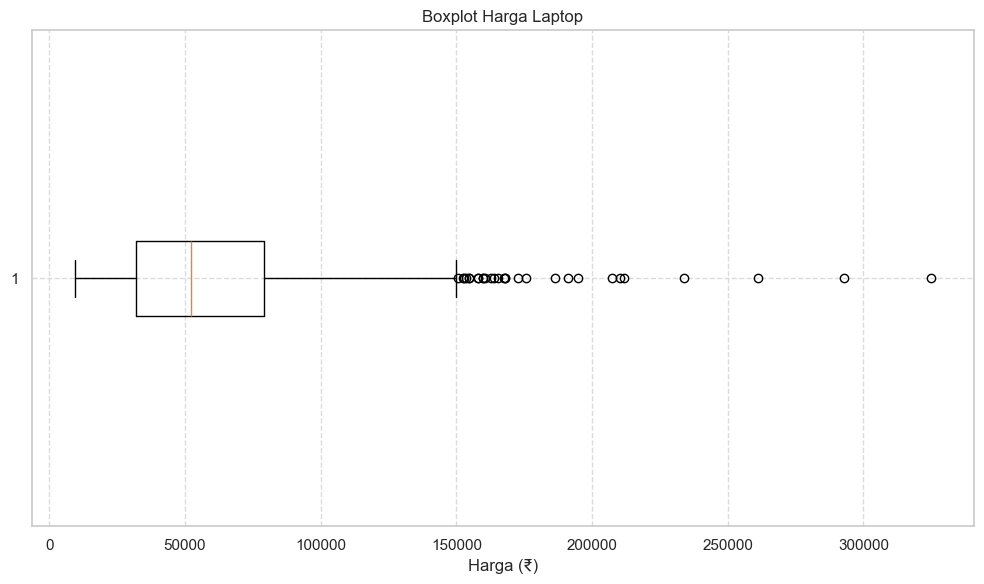

Batas bawah: -39124.57
Batas atas: 150313.54
Jumlah outlier: 29


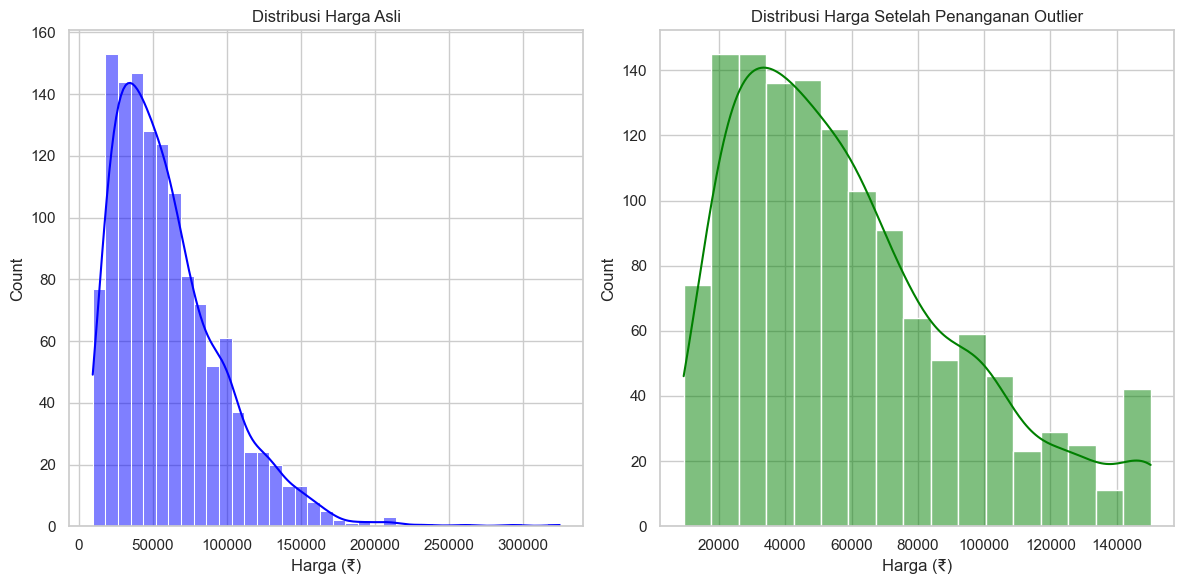

In [2]:
# Visualisasi outlier pada variabel harga dengan boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'], vert=False)
plt.title('Boxplot Harga Laptop')
plt.xlabel('Harga (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Deteksi outlier menggunakan metode IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas bawah: {lower_bound:.2f}")
print(f"Batas atas: {upper_bound:.2f}")
print(f"Jumlah outlier: {len(df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)])}")

# Pendekatan 1: Mempertahankan outlier karena mewakili laptop premium
# Pendekatan 2: Capping/Winsorizing (diterapkan pada analisis)
df_cleaned = df.copy()
df_cleaned['Price'] = np.where(df_cleaned['Price'] > upper_bound, upper_bound, df_cleaned['Price'])
df_cleaned['Price'] = np.where(df_cleaned['Price'] < lower_bound, lower_bound, df_cleaned['Price'])

# Visualisasi perbandingan distribusi sebelum dan sesudah penanganan outlier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribusi Harga Asli')
plt.xlabel('Harga (₹)')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Price'], kde=True, color='green')
plt.title('Distribusi Harga Setelah Penanganan Outlier')
plt.xlabel('Harga (₹)')

plt.tight_layout()
plt.show()

2.5.2 Feature Engineer

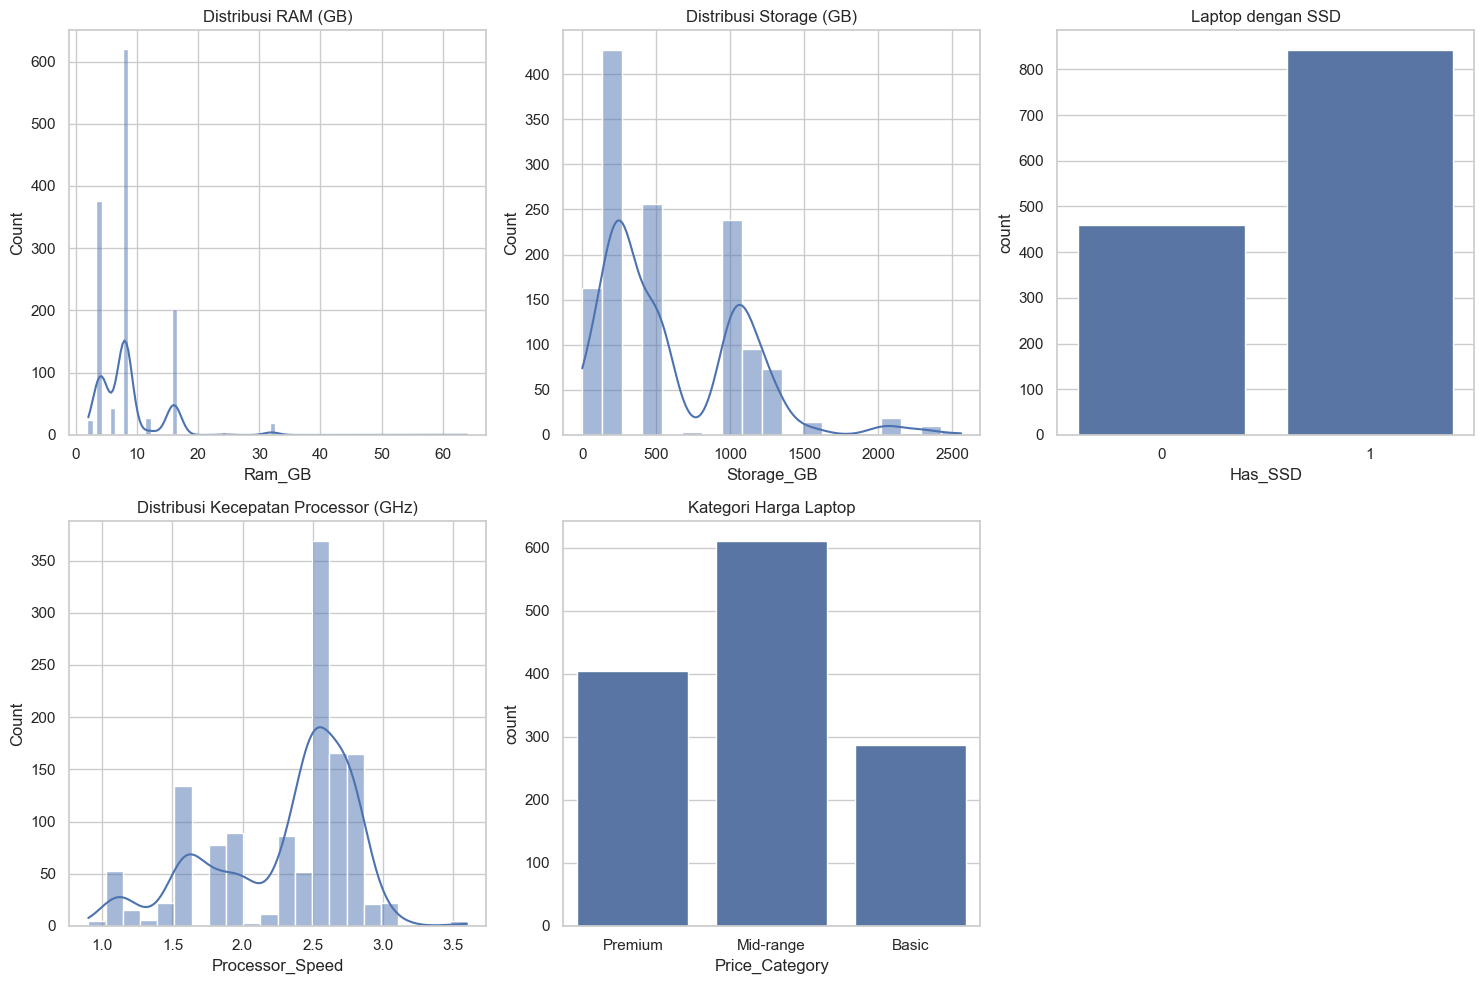

In [3]:
# Import yang diperlukan
import re  # Tambahkan ini untuk menggunakan regex

# Ekstrak kapasitas RAM dalam GB
df['Ram_GB'] = df['Ram'].str.extract('(\d+)').astype(int)

# Ekstrak informasi storage
def extract_storage_size(text):
    total_gb = 0
    if isinstance(text, str):
        sizes = re.findall(r'(\d+)(?:\s*)(GB|TB)', text)
        for size, unit in sizes:
            if unit == 'TB':
                total_gb += int(size) * 1024
            else:
                total_gb += int(size)
    return total_gb

def has_ssd(text):
    return 1 if isinstance(text, str) and 'SSD' in text else 0

def has_hdd(text):
    return 1 if isinstance(text, str) and 'HDD' in text else 0

df['Storage_GB'] = df['Memory'].apply(extract_storage_size)
df['Has_SSD'] = df['Memory'].apply(has_ssd)
df['Has_HDD'] = df['Memory'].apply(has_hdd)

# Ekstrak informasi processor
def get_processor_speed(text):
    if isinstance(text, str):
        match = re.search(r'(\d+\.?\d*)GHz', text)
        if match:
            return float(match.group(1))
    return np.nan

df['Processor_Speed'] = df['Cpu'].apply(get_processor_speed)

# Ekstrak resolusi layar
def extract_resolution(text):
    if isinstance(text, str):
        match = re.search(r'(\d+)x(\d+)', text)
        if match:
            return int(match.group(1)) * int(match.group(2))
    return np.nan

df['Screen_Resolution_Pixels'] = df['ScreenResolution'].apply(extract_resolution)

# Kategori laptop (basic, mid-range, premium) berdasarkan harga
def categorize_price(price):
    if price < 30000:
        return 'Basic'
    elif price < 70000:
        return 'Mid-range'
    else:
        return 'Premium'

df['Price_Category'] = df['Price'].apply(categorize_price)

# Visualisasi distribusi fitur hasil engineering
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Ram_GB'], kde=True)
plt.title('Distribusi RAM (GB)')

plt.subplot(2, 3, 2)
sns.histplot(df['Storage_GB'], kde=True)
plt.title('Distribusi Storage (GB)')

plt.subplot(2, 3, 3)
sns.countplot(x='Has_SSD', data=df)
plt.title('Laptop dengan SSD')

plt.subplot(2, 3, 4)
sns.histplot(df['Processor_Speed'].dropna(), kde=True)  # dropna() untuk menghindari warning
plt.title('Distribusi Kecepatan Processor (GHz)')

plt.subplot(2, 3, 5)
sns.countplot(x='Price_Category', data=df)
plt.title('Kategori Harga Laptop')

plt.tight_layout()
plt.show()

2.5.3 Data Transformation

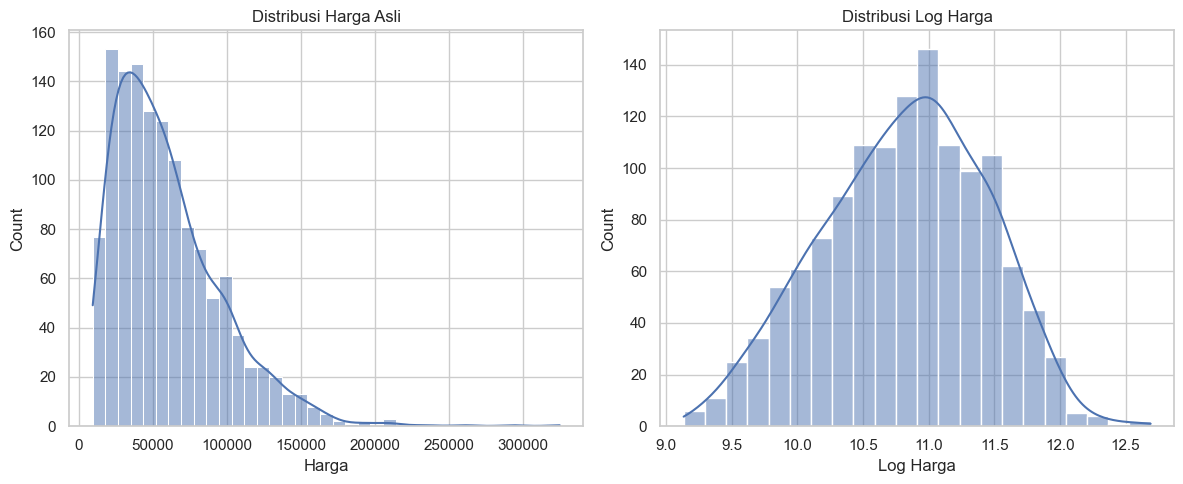


Korelasi fitur dengan Log Harga:
Log_Price     1.000000
Price         0.927584
Ram_GB        0.684805
Has_SSD       0.593653
Storage_GB    0.156017
Inches        0.044328
Has_HDD      -0.180975
Name: Log_Price, dtype: float64


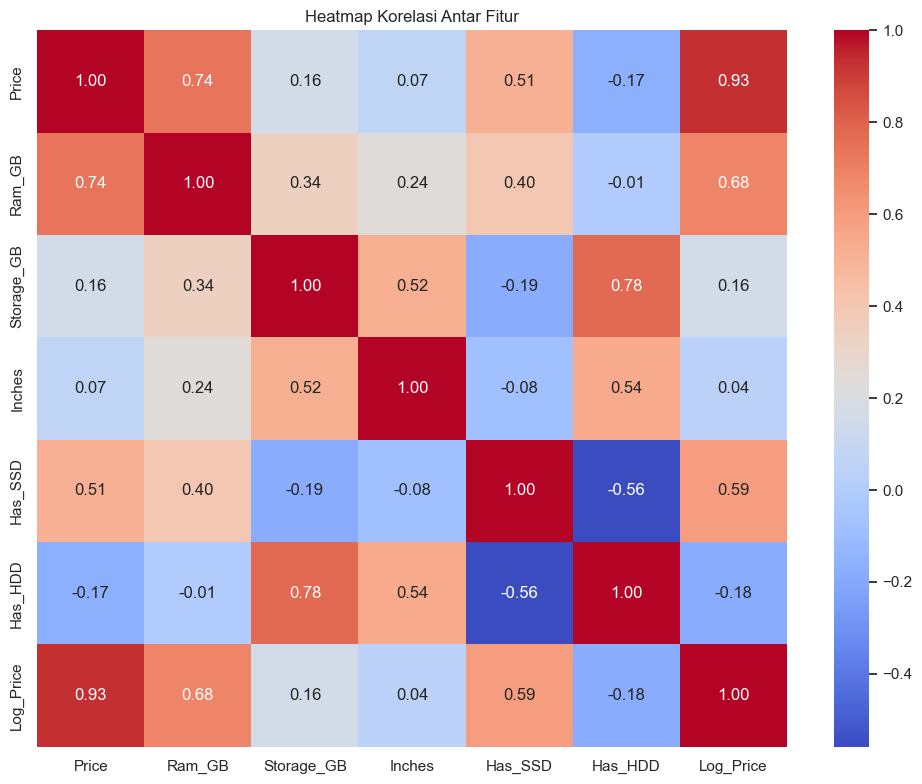


Hasil Transformasi Data:
Jumlah fitur numerik yang distandarisasi: 5
Fitur yang distandarisasi: Ram_GB, Storage_GB, Inches, Has_SSD, Has_HDD
Range nilai setelah standardisasi: [-3.45, 10.94]


In [4]:
# Import yang diperlukan
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# LANGKAH 1: Persiapkan data untuk model dengan hanya menggunakan kolom yang sudah diproses dengan benar
# Kita mulai dari awal dengan df original dan hanya pilih kolom yang sudah kita buat/transformasi
safe_columns = ['Price', 'Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD', 'Has_HDD']

# Buat dataframe baru hanya dengan kolom yang aman
df_safe = df[safe_columns].copy()

# LANGKAH 2: Transformasi logaritmik pada variabel target (harga)
df_safe['Log_Price'] = np.log1p(df_safe['Price'])

# LANGKAH 3: Standardisasi fitur numerik
numeric_cols = ['Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD', 'Has_HDD']
scaler = StandardScaler()
df_safe[numeric_cols] = scaler.fit_transform(df_safe[numeric_cols])

# LANGKAH 4: Visualisasi distribusi harga sebelum dan sesudah transformasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga Asli')
plt.xlabel('Harga')

plt.subplot(1, 2, 2)
sns.histplot(df_safe['Log_Price'], kde=True)
plt.title('Distribusi Log Harga')
plt.xlabel('Log Harga')

plt.tight_layout()
plt.show()

# LANGKAH 5: Korelasi fitur dengan harga (hanya menggunakan kolom numerik yang aman)
corr_matrix = df_safe.corr()
corr_with_price = corr_matrix['Log_Price'].sort_values(ascending=False)
print("\nKorelasi fitur dengan Log Harga:")
print(corr_with_price)

# LANGKAH 6: Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

# Informasi tambahan tentang transformasi data
print("\nHasil Transformasi Data:")
print(f"Jumlah fitur numerik yang distandarisasi: {len(numeric_cols)}")
print(f"Fitur yang distandarisasi: {', '.join(numeric_cols)}")
print(f"Range nilai setelah standardisasi: [{df_safe[numeric_cols].min().min():.2f}, {df_safe[numeric_cols].max().max():.2f}]")

# 2.6 Data Preparation K-Means (Clustering)

2.6.1 Feature Selection

Missing values pada fitur clustering:
Ram_GB                      0
Storage_GB                  0
Inches                      0
Has_SSD                     0
Processor_Speed             0
Screen_Resolution_Pixels    0
Price                       0
dtype: int64


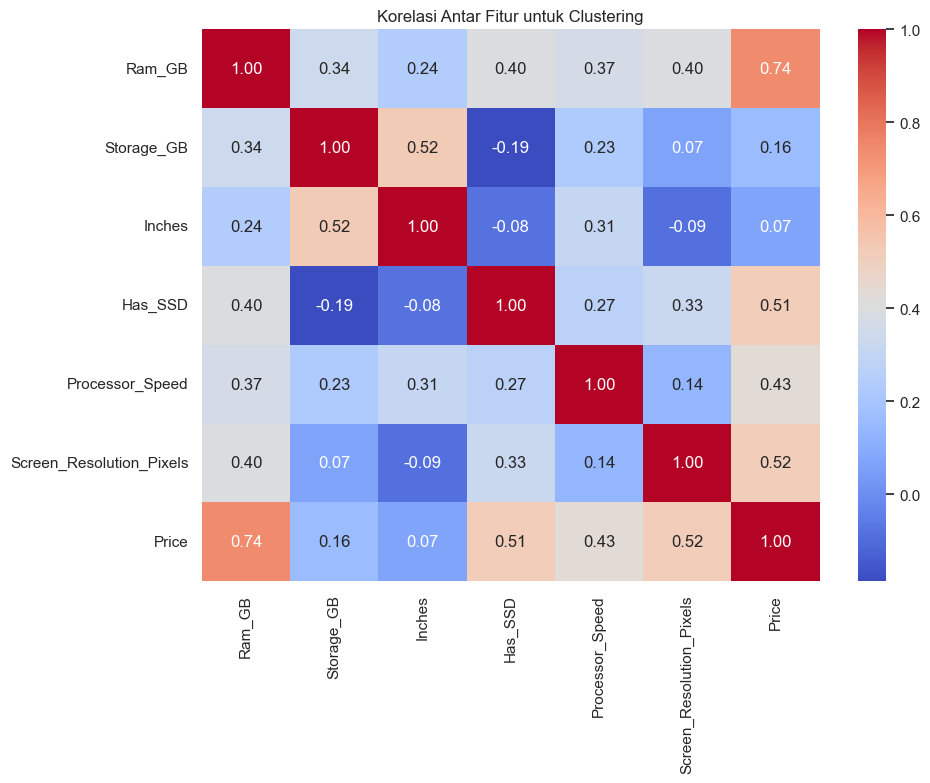

In [5]:
# Seleksi fitur untuk clustering
cluster_features = [
    'Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD', 'Processor_Speed',
    'Screen_Resolution_Pixels', 'Price'
]

df_cluster = df[cluster_features].copy()

# Cek missing values pada fitur yang dipilih
missing_values = df_cluster.isnull().sum()
print("Missing values pada fitur clustering:")
print(missing_values)

# Imputasi nilai yang hilang dengan median
for col in df_cluster.columns:
    if df_cluster[col].isnull().sum() > 0:
        df_cluster[col] = df_cluster[col].fillna(df_cluster[col].median())

# Analisis korelasi antar fitur untuk clustering
plt.figure(figsize=(10, 8))
sns.heatmap(df_cluster.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur untuk Clustering')
plt.tight_layout()
plt.show()

2.6.2 Data Scaling

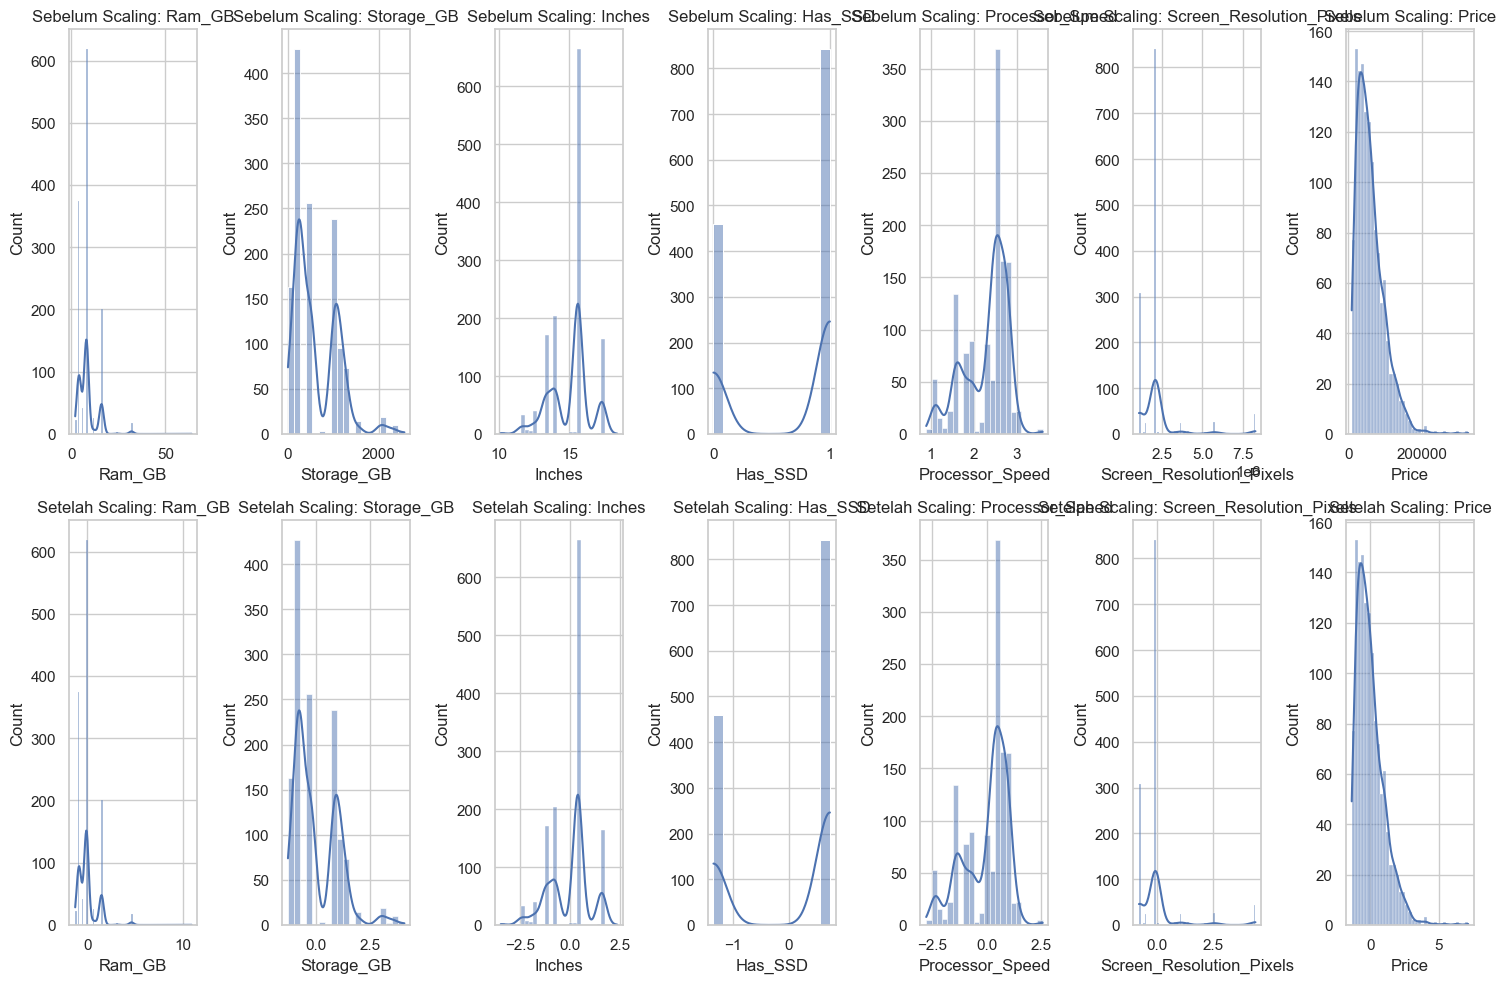

In [6]:
# Scaling fitur untuk clustering
scaler_cluster = StandardScaler()
df_cluster_scaled = pd.DataFrame(
    scaler_cluster.fit_transform(df_cluster),
    columns=df_cluster.columns
)

# Visualisasi distribusi fitur sebelum dan sesudah scaling
plt.figure(figsize=(15, 10))

# Sebelum scaling
for i, col in enumerate(df_cluster.columns):
    plt.subplot(2, len(df_cluster.columns), i+1)
    sns.histplot(df_cluster[col], kde=True)
    plt.title(f'Sebelum Scaling: {col}')
    plt.tight_layout()

# Setelah scaling
for i, col in enumerate(df_cluster_scaled.columns):
    plt.subplot(2, len(df_cluster_scaled.columns), len(df_cluster_scaled.columns)+i+1)
    sns.histplot(df_cluster_scaled[col], kde=True)
    plt.title(f'Setelah Scaling: {col}')
    plt.tight_layout()

plt.show()

2.6.3 Data reduction


Variance explained by PC1: 40.04%
Variance explained by PC2: 24.04%
Total variance explained: 64.08%


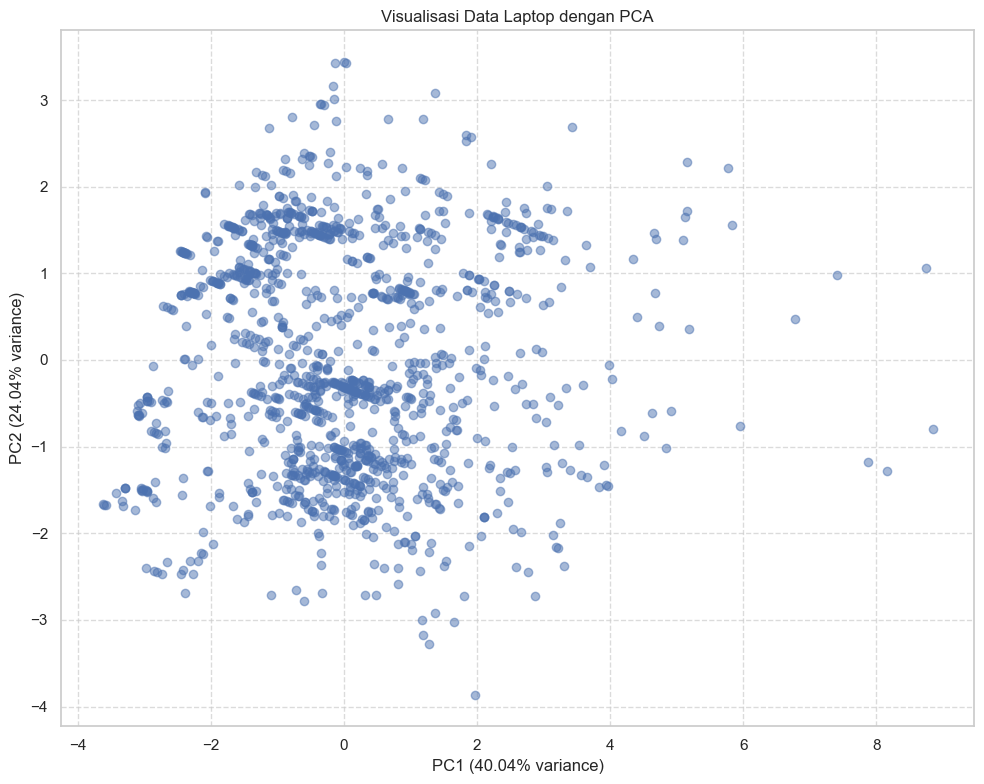

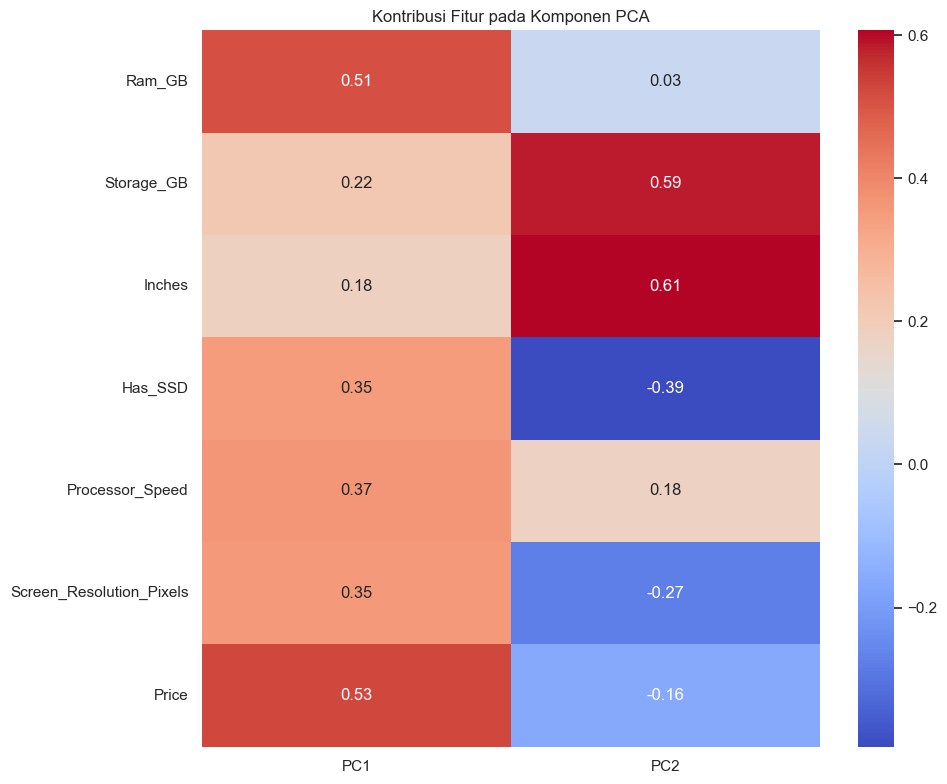

In [7]:
# Import yang diperlukan
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(
    pca.fit_transform(df_cluster_scaled),
    columns=['PC1', 'PC2']
)

# Informasi variance explained
explained_variance = pca.explained_variance_ratio_
print(f"\nVariance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained: {sum(explained_variance):.2%}")

# Visualisasi hasil PCA
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('Visualisasi Data Laptop dengan PCA')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisis komponen PCA
components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=df_cluster.columns
)
plt.figure(figsize=(10, 8))
sns.heatmap(components, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Kontribusi Fitur pada Komponen PCA')
plt.tight_layout()
plt.show()

2.6.4 Penentuan Jumlah Cluster Optimal

Missing values pada fitur clustering:
Ram_GB                      0
Storage_GB                  0
Inches                      0
Has_SSD                     0
Processor_Speed             0
Screen_Resolution_Pixels    0
Price                       0
dtype: int64
k=2: Silhouette Score = 0.260
k=3: Silhouette Score = 0.288
k=4: Silhouette Score = 0.311
k=5: Silhouette Score = 0.333
k=6: Silhouette Score = 0.289
k=7: Silhouette Score = 0.290
k=8: Silhouette Score = 0.303
k=9: Silhouette Score = 0.302
Variance explained by PC1: 39.58%
Variance explained by PC2: 24.23%
Total variance explained: 63.81%


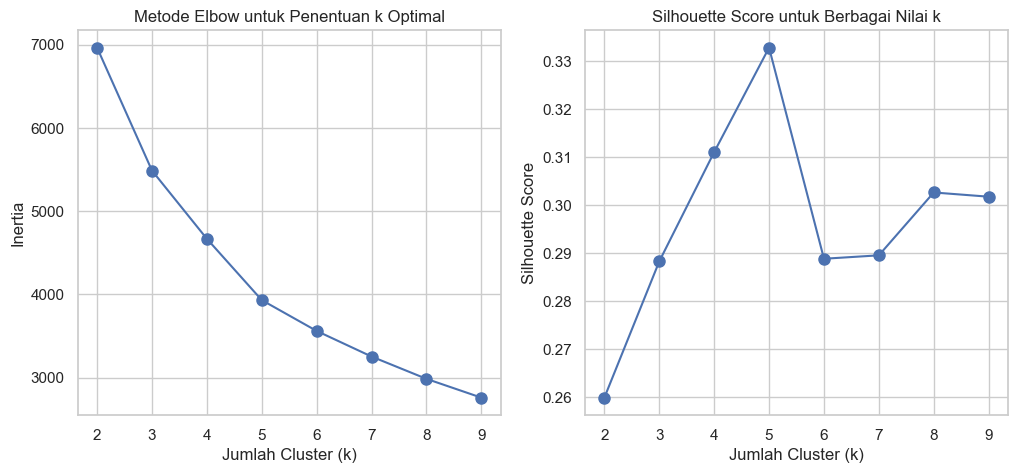

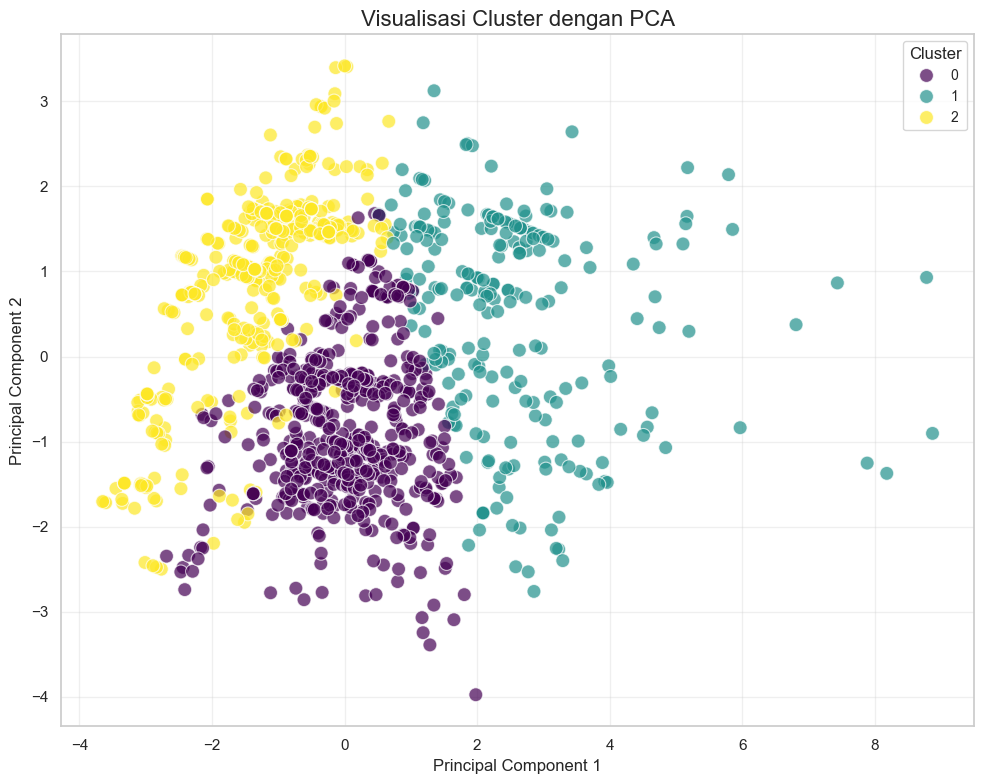


Karakteristik Cluster:
        Ram_GB Storage_GB Inches Has_SSD      Price                       \
          mean       mean   mean    mean       mean       min        max   
Cluster                                                                    
0         7.53     351.15  14.53    1.00   61061.03   9270.72  165168.00   
1        16.05    1065.95  16.03    0.96  108172.41  47365.92  324954.72   
2         5.50     724.54  15.15    0.00   32695.78  10224.43  106187.04   

              Processor_Speed Screen_Resolution_Pixels  
        count            mean                     mean  
Cluster                                                 
0         615            2.32               2200765.81  
1         238            2.65               3279547.16  
2         450            2.14               1537670.83  


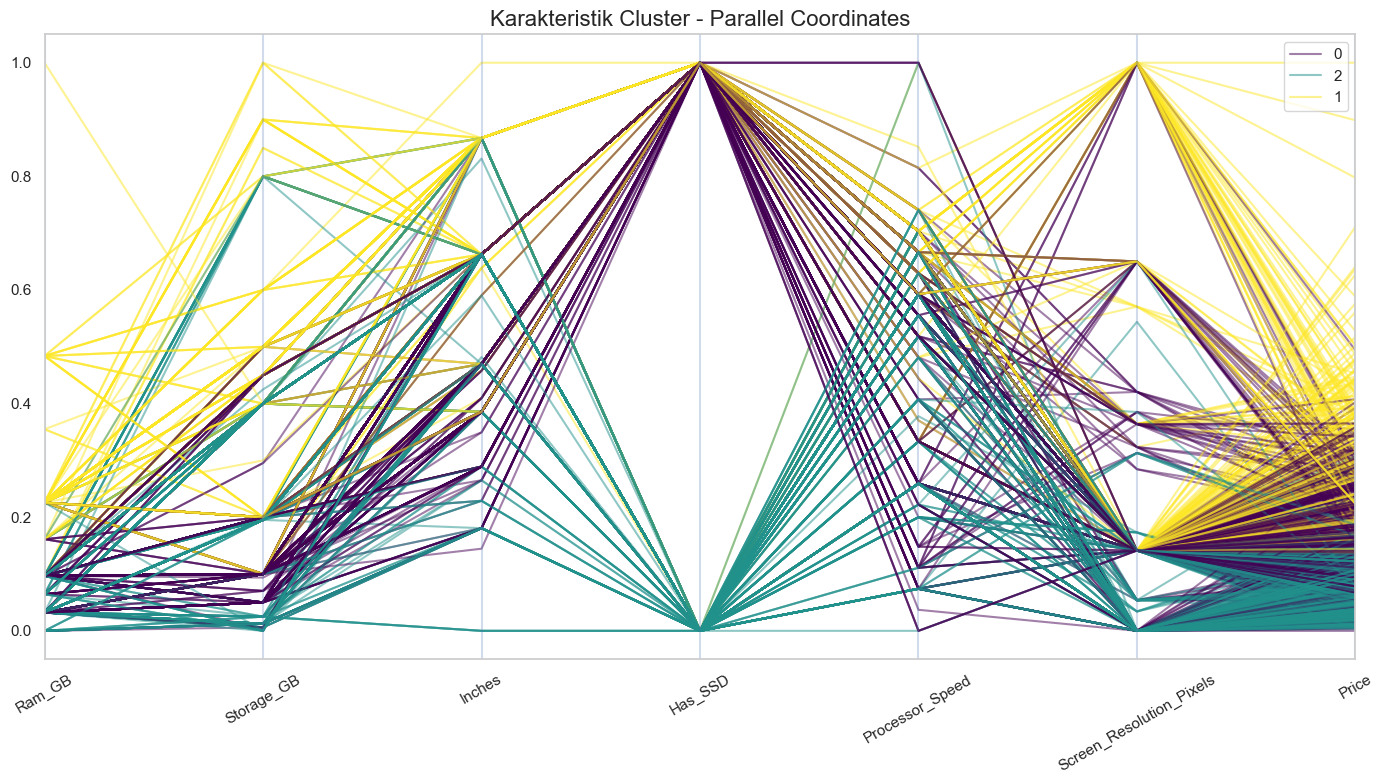


Hasil cluster telah disimpan ke 'laptop_data_with_clusters.csv'


In [9]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 0. Load dataset original
df = pd.read_csv('laptop_data.csv')  # Sesuaikan dengan path file Anda

# 1. Preprocessing dasar (seperti yang sudah dilakukan di bagian sebelumnya)
# Ekstrak RAM dalam GB
df['Ram_GB'] = df['Ram'].str.extract('(\d+)').astype(int)

# Fungsi untuk ekstrak kapasitas storage
def extract_storage_size(text):
    total_gb = 0
    if isinstance(text, str):
        import re
        sizes = re.findall(r'(\d+)(?:\s*)(GB|TB)', text)
        for size, unit in sizes:
            if unit == 'TB':
                total_gb += int(size) * 1024
            else:
                total_gb += int(size)
    return total_gb

# Fungsi untuk cek keberadaan SSD
def has_ssd(text):
    return 1 if isinstance(text, str) and 'SSD' in text else 0

# Ekstrak processor speed (GHz)
def extract_processor_speed(text):
    if isinstance(text, str):
        import re
        # Cari pola GHz
        ghz_match = re.search(r'(\d+\.\d+)(?:\s*)GHz', text)
        if ghz_match:
            return float(ghz_match.group(1))
        # Coba pola alternatif
        ghz_match2 = re.search(r'(\d+\.\d+)(?:\s*)Hz', text)
        if ghz_match2:
            return float(ghz_match2.group(1))
    return np.nan  # Return NaN jika tidak ditemukan

# Ekstrak screen resolution dalam total pixels
def extract_resolution_pixels(text):
    if isinstance(text, str):
        import re
        # Cari pola resolusi seperti 1920x1080
        res_match = re.search(r'(\d+)x(\d+)', text)
        if res_match:
            width = int(res_match.group(1))
            height = int(res_match.group(2))
            return width * height
    return np.nan  # Return NaN jika tidak ditemukan

# Terapkan fungsi-fungsi ekstraksi
df['Storage_GB'] = df['Memory'].apply(extract_storage_size)
df['Has_SSD'] = df['Memory'].apply(has_ssd)
df['Processor_Speed'] = df['Cpu'].apply(extract_processor_speed)
df['Screen_Resolution_Pixels'] = df['ScreenResolution'].apply(extract_resolution_pixels)

# Isi missing values dengan median jika ada
if df['Processor_Speed'].isnull().sum() > 0:
    df['Processor_Speed'].fillna(df['Processor_Speed'].median(), inplace=True)

if df['Screen_Resolution_Pixels'].isnull().sum() > 0:
    df['Screen_Resolution_Pixels'].fillna(df['Screen_Resolution_Pixels'].median(), inplace=True)

# Periksa missing values setelah preprocessing
print("Missing values pada fitur clustering:")
features_for_clustering = ['Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD',
                          'Processor_Speed', 'Screen_Resolution_Pixels', 'Price']
print(df[features_for_clustering].isnull().sum())

# 2. Feature Selection untuk clustering
features = ['Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD',
            'Processor_Speed', 'Screen_Resolution_Pixels', 'Price']

# Buat subset data dengan fitur terpilih
df_cluster = df[features].copy()

# 3. Data Scaling - standardisasi fitur
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# 4. Penentuan Jumlah Cluster Optimal
# 4.1 Evaluasi menggunakan metode Elbow dan Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    if k > 1:
        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"k={k}: Silhouette Score = {score:.3f}")

# 4.2 Visualisasi metode Elbow
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Penentuan k Optimal')
plt.grid(True)

# 4.3 Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
# Perbaikan: Menggunakan seluruh k_range untuk x-axis karena semua nilai k memiliki silhouette score
plt.plot(list(k_range), silhouette_scores, 'o-', markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Nilai k')
plt.grid(True)

# 5. PCA untuk visualisasi
# 5.1 Terapkan PCA dengan 2 komponen
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Hitung dan tampilkan variance explained
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# 5.2 Implementasi k-means dengan jumlah cluster optimal (k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

# 5.3 Buat dataframe untuk hasil PCA
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

# 5.4 Visualisasi cluster dalam ruang PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Cluster dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Analisis karakteristik cluster
# Tambahkan label cluster ke dataframe asli untuk analisis
df['Cluster'] = cluster_labels

# Hitung statistik untuk setiap cluster
cluster_stats = df.groupby('Cluster').agg({
    'Ram_GB': 'mean',
    'Storage_GB': 'mean',
    'Inches': 'mean',
    'Has_SSD': 'mean',
    'Price': ['mean', 'min', 'max', 'count'],
    'Processor_Speed': 'mean',
    'Screen_Resolution_Pixels': 'mean'
}).round(2)

print("\nKarakteristik Cluster:")
print(cluster_stats)

# 7. Visualisasi karakteristik cluster dengan parallel coordinates
# Buat DataFrame untuk visualisasi paralel coordinates
parallel_df = df_cluster.copy()
parallel_df['Cluster'] = cluster_labels

# Normalisasi data untuk visualisasi
for col in features:
    parallel_df[col] = (parallel_df[col] - parallel_df[col].min()) / (parallel_df[col].max() - parallel_df[col].min())

# Plot parallel coordinates
plt.figure(figsize=(14, 8))
pd.plotting.parallel_coordinates(
    parallel_df, 'Cluster', colormap='viridis',
    alpha=0.5, axvlines=True, axvlines_kwds={'alpha': 0.25}
)
plt.title('Karakteristik Cluster - Parallel Coordinates', fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 8. Simpan hasil cluster
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels
df_with_clusters.to_csv('laptop_data_with_clusters.csv', index=False)
print("\nHasil cluster telah disimpan ke 'laptop_data_with_clusters.csv'")

# 2.7 Data Modeling & Evaluation

2.7.1 Splitting data

In [10]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split

# Persiapan fitur dan target untuk model regresi
# Gunakan df_safe yang kita buat sebelumnya di bagian 2.5.3
# dan hanya drop kolom yang pasti ada di df_safe

# Periksa kolom yang ada di dataframe
print("Kolom yang tersedia:", df_safe.columns.tolist())

# Definisikan fitur dan target dengan aman
X_reg = df_safe.drop(['Price', 'Log_Price'], axis=1)  # Hanya drop kolom yang pasti ada
y_reg = df_safe['Log_Price']  # menggunakan transformasi logaritmik pada harga

# Split data untuk model regresi
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")
print(f"Jumlah fitur: {X_train.shape[1]}")
print("\nContoh data training (5 baris pertama):")
print(X_train.head())

Kolom yang tersedia: ['Price', 'Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD', 'Has_HDD', 'Log_Price']
Jumlah data training: 1042
Jumlah data testing: 261
Jumlah fitur: 5

Contoh data training (5 baris pertama):
        Ram_GB  Storage_GB    Inches   Has_SSD   Has_HDD
10   -0.862176   -0.230396  0.408772 -1.353739  1.123456
147  -0.862176    0.860536  0.408772 -1.353739  1.123456
1287 -0.468686    0.860536  0.408772 -1.353739  1.123456
767   1.498767    1.127023  0.408772  0.738695  1.123456
816   1.498767   -0.205413 -1.765512  0.738695 -0.890111


2.7.2 Supervised Learning : Linear regresion


Evaluasi Model Linear Regression:
RMSE (pada log harga): 0.3768
R² Score: 0.5995

Evaluasi Model dalam Skala Harga Asli:
RMSE: 25379.59
R² Score: 0.5533


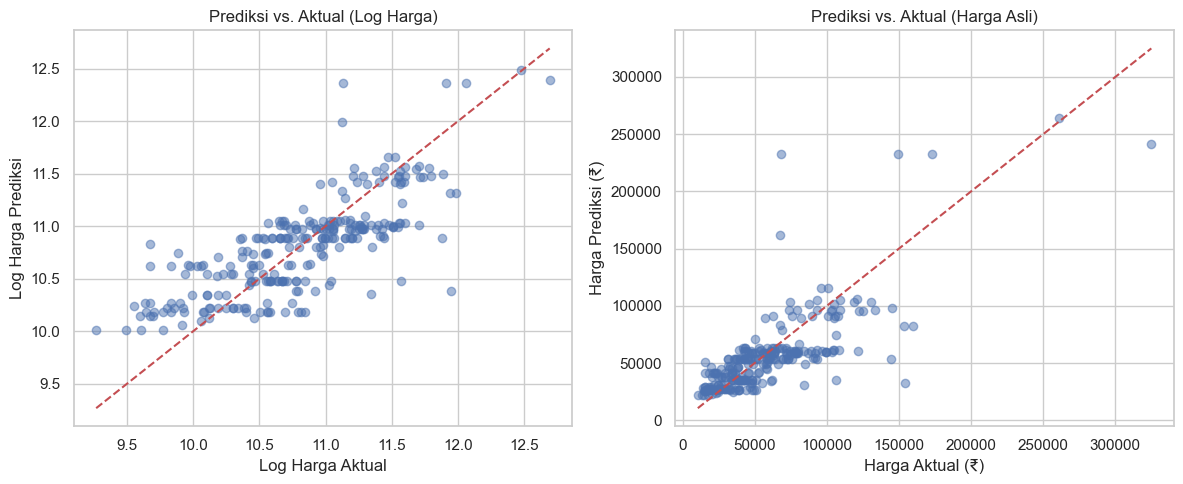

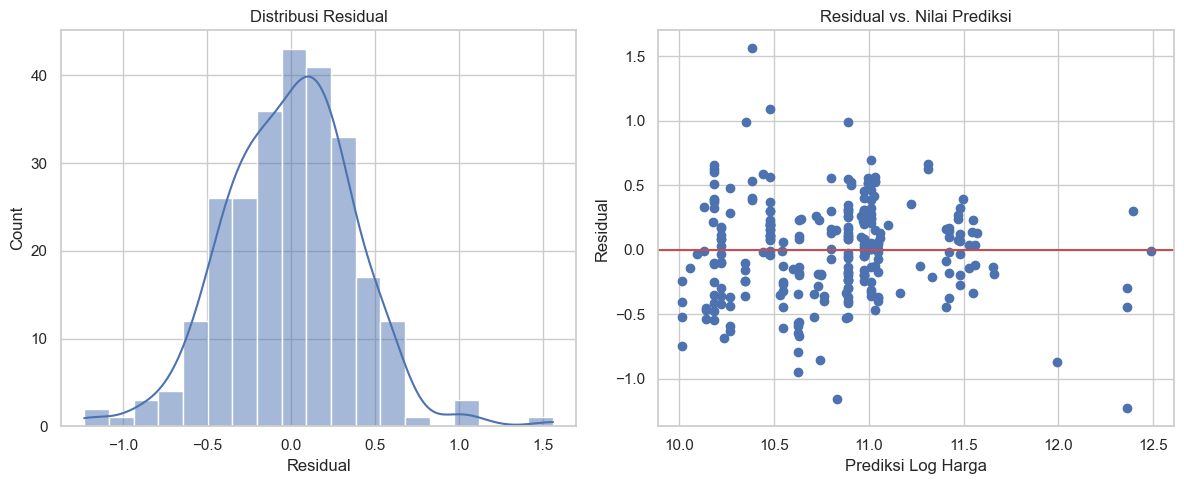

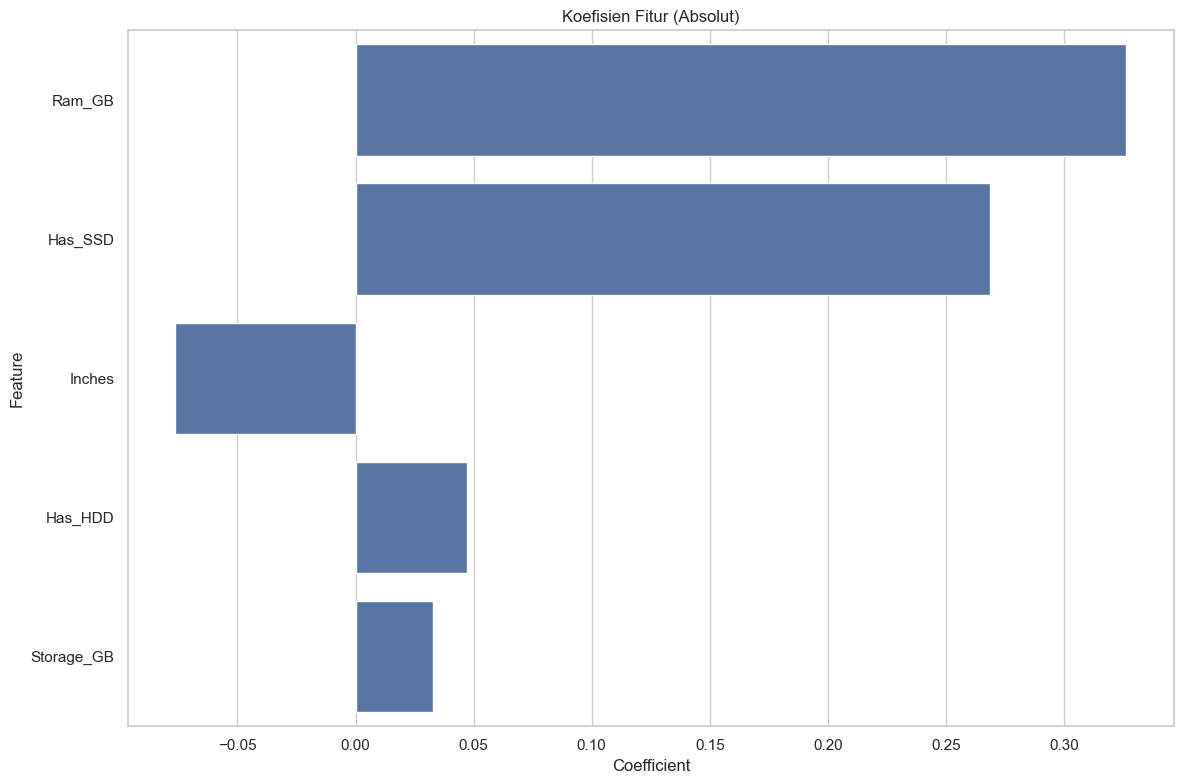

In [11]:
# Import library yang diperlukan
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = lr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model Linear Regression:")
print(f"RMSE (pada log harga): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Transformasi balik prediksi untuk interpretasi dalam skala asli
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)

mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

print("\nEvaluasi Model dalam Skala Harga Asli:")
print(f"RMSE: {rmse_orig:.2f}")
print(f"R² Score: {r2_orig:.4f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 5))

# Plot prediksi vs aktual dalam skala log
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prediksi vs. Aktual (Log Harga)')
plt.xlabel('Log Harga Aktual')
plt.ylabel('Log Harga Prediksi')
plt.grid(True)

# Plot prediksi vs aktual dalam skala asli
plt.subplot(1, 2, 2)
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title('Prediksi vs. Aktual (Harga Asli)')
plt.xlabel('Harga Aktual (₹)')
plt.ylabel('Harga Prediksi (₹)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analisis residual
residuals = y_test - y_pred
plt.figure(figsize=(12, 5))

# Histogram residual
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')

# Plot residual vs. nilai prediksi
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual vs. Nilai Prediksi')
plt.xlabel('Prediksi Log Harga')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analisis koefisien model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
top_features = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Koefisien Fitur (Absolut)')
plt.tight_layout()
plt.show()

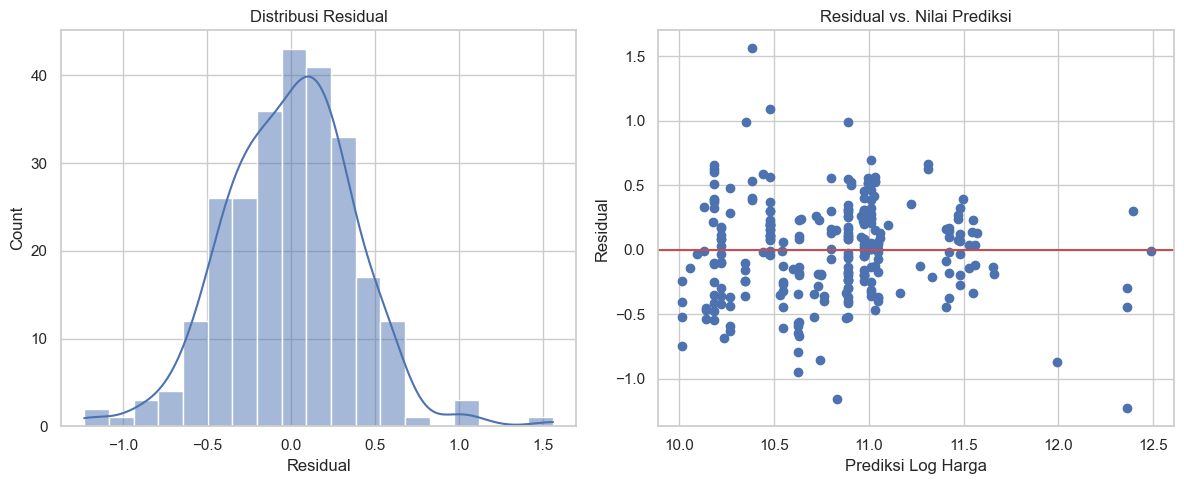

In [12]:
# Analisis residual
residuals = y_test - y_pred
plt.figure(figsize=(12, 5))

# Histogram residual
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')

# Plot residual vs. nilai prediksi
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual vs. Nilai Prediksi')
plt.xlabel('Prediksi Log Harga')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()

2.7.3 unsupervised learning: K-Means Clustering

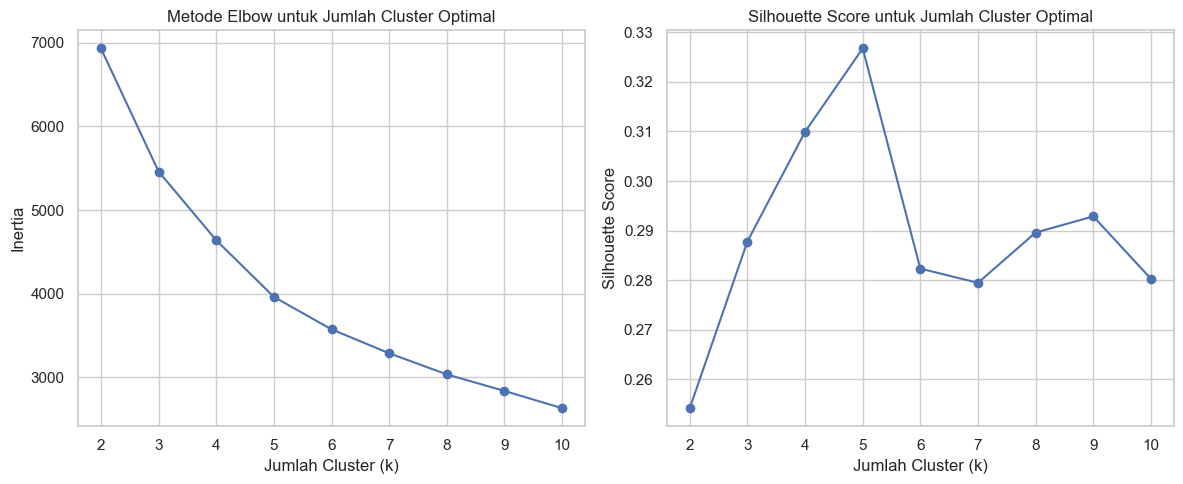


Karakteristik rata-rata tiap cluster:
            Ram_GB   Storage_GB     Inches   Has_SSD  Processor_Speed  \
Cluster                                                                 
0        16.050420  1065.680672  16.032353  0.957983         2.653361   
1         5.486607   724.776786  15.149554  0.000000         2.138304   
2         7.526742   352.291734  14.529498  0.996759         2.317407   

         Screen_Resolution_Pixels          Price  
Cluster                                           
0                    3.279547e+06  108316.350575  
1                    1.535278e+06   32381.726336  
2                    2.200354e+06   61141.590076  


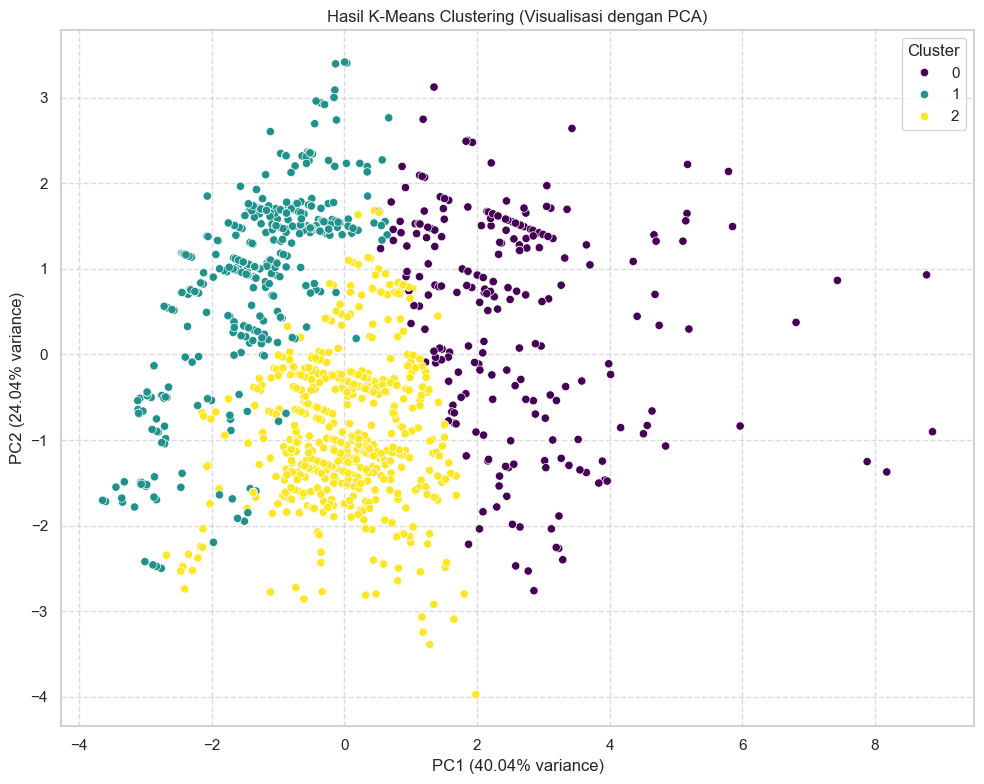

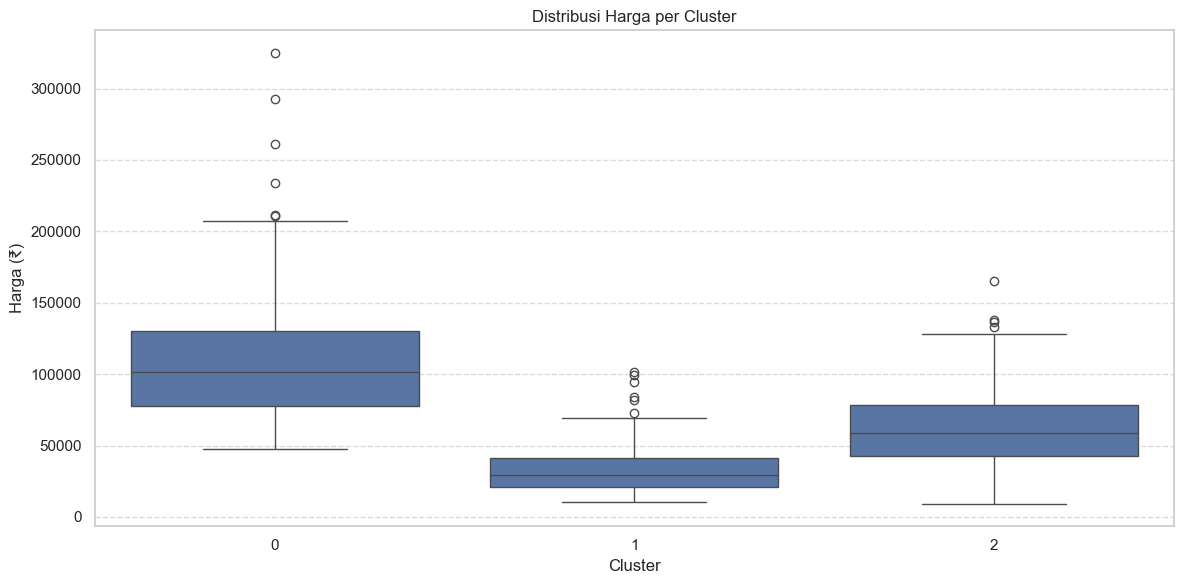


Profiling Cluster:

Cluster 0:
Harga: ₹108316.35 (range: ₹47365.92 - ₹324954.72)
Ram_GB rata-rata: 16.05
Storage_GB rata-rata: 1065.68
Inches rata-rata: 16.03
Has_SSD rata-rata: 0.96

Cluster 1:
Harga: ₹32381.73 (range: ₹10224.43 - ₹101657.71)
Ram_GB rata-rata: 5.49
Storage_GB rata-rata: 724.78
Inches rata-rata: 15.15
Has_SSD rata-rata: 0.00

Cluster 2:
Harga: ₹61141.59 (range: ₹9270.72 - ₹165168.00)
Ram_GB rata-rata: 7.53
Storage_GB rata-rata: 352.29
Inches rata-rata: 14.53
Has_SSD rata-rata: 1.00


In [13]:
# Import library yang diperlukan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Menentukan jumlah cluster optimal dengan metode elbow
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)
    # Silhouette score bisa dihitung untuk k >= 2
    silhouette_scores.append(silhouette_score(df_cluster_scaled, kmeans.labels_))

# Plot metode elbow
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Jumlah Cluster Optimal')
plt.grid(True)

# Sekarang k_range dan silhouette_scores memiliki dimensi yang sama
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Jumlah Cluster Optimal')
plt.grid(True)

plt.tight_layout()
plt.show()

# Aplikasi K-Means dengan jumlah cluster optimal (misalnya k=3)
optimal_k = 3  # Sesuaikan berdasarkan hasil elbow method
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_cluster_scaled)

# Tambahkan label cluster ke dataframe
df_cluster['Cluster'] = cluster_labels

# Analisis karakteristik tiap cluster
cluster_stats = df_cluster.groupby('Cluster').mean()
print("\nKarakteristik rata-rata tiap cluster:")
print(cluster_stats)

# Visualisasi hasil clustering dengan PCA
# Pastikan df_pca sudah dibuat dari bagian 2.6.3
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Hasil K-Means Clustering (Visualisasi dengan PCA)')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribusi harga di tiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Price', data=df_cluster)
plt.title('Distribusi Harga per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Harga (₹)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Profiling cluster
print("\nProfiling Cluster:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_data = df_cluster[df_cluster['Cluster'] == i]

    # Harga rata-rata dan rentang
    price_mean = cluster_data['Price'].mean()
    price_min = cluster_data['Price'].min()
    price_max = cluster_data['Price'].max()
    print(f"Harga: ₹{price_mean:.2f} (range: ₹{price_min:.2f} - ₹{price_max:.2f})")

    # Spesifikasi rata-rata
    for col in ['Ram_GB', 'Storage_GB', 'Inches', 'Has_SSD']:
        if col in cluster_data.columns:
            print(f"{col} rata-rata: {cluster_data[col].mean():.2f}")

# 3.1 Hasil Evaluasi Model

3.1.1 Hasil Model Evaluasi Regression (Linear Regression)

RMSE (log scale): 0.3768
R² Score (log scale): 0.5995
RMSE (original scale): 25379.59
R² Score (original scale): 0.5533


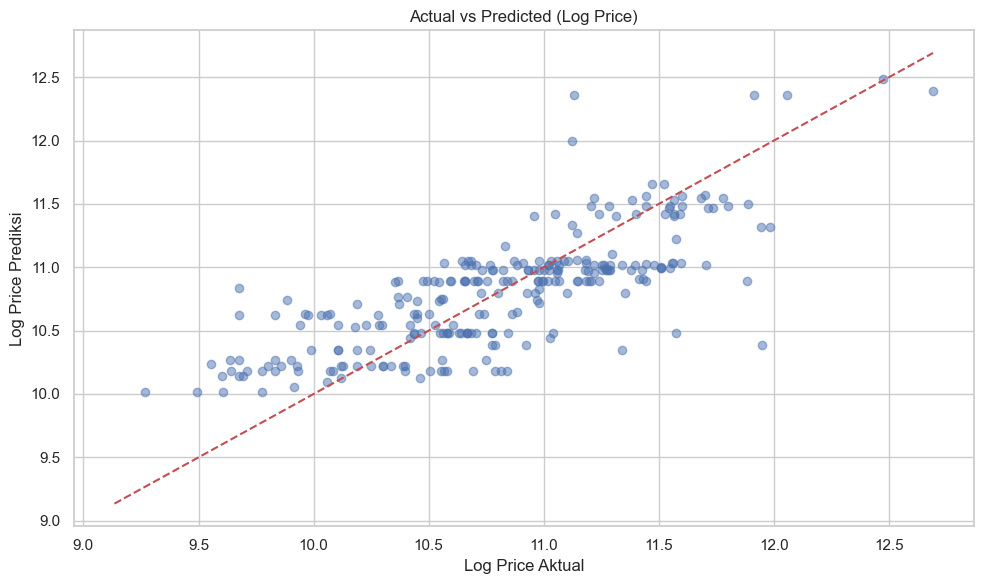

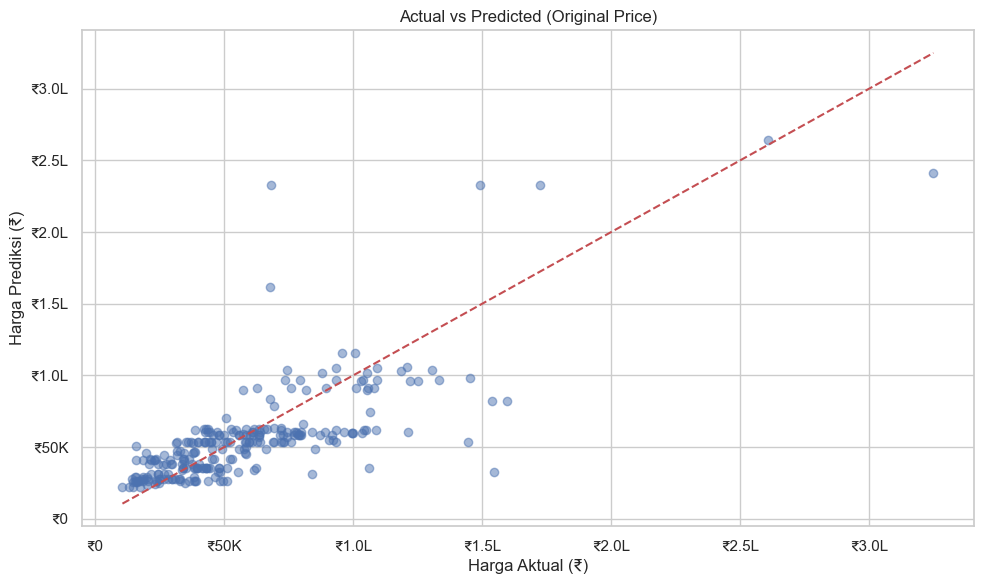

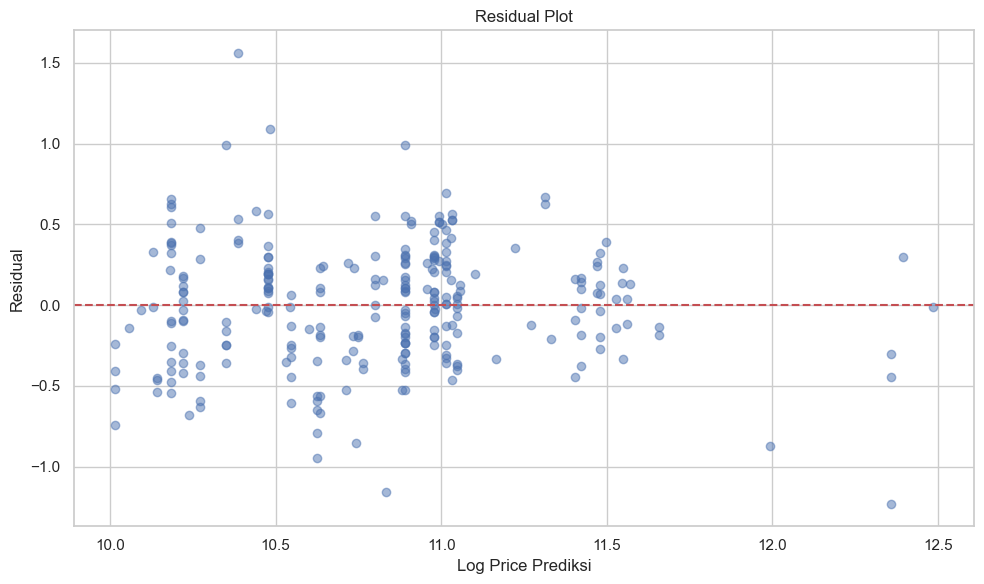

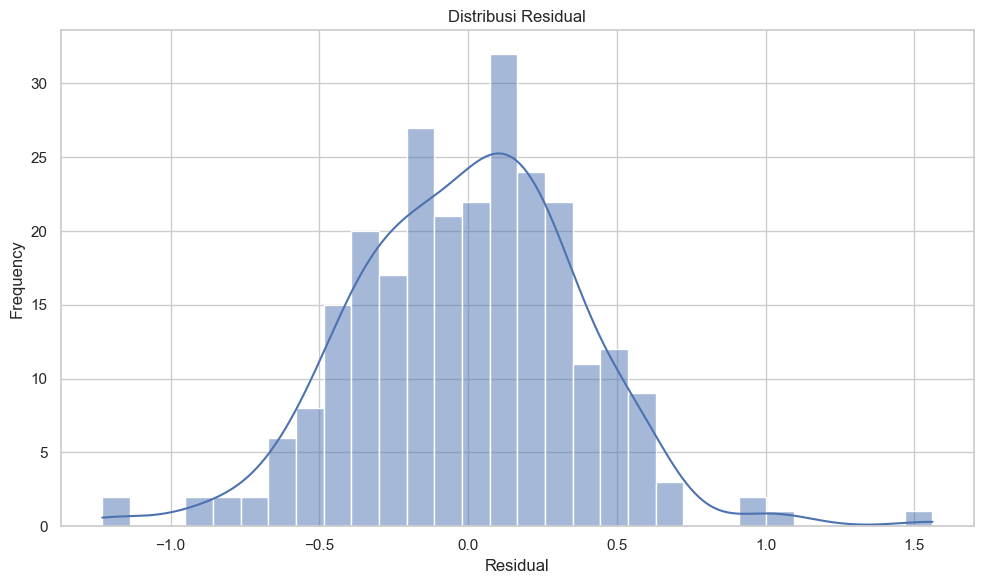

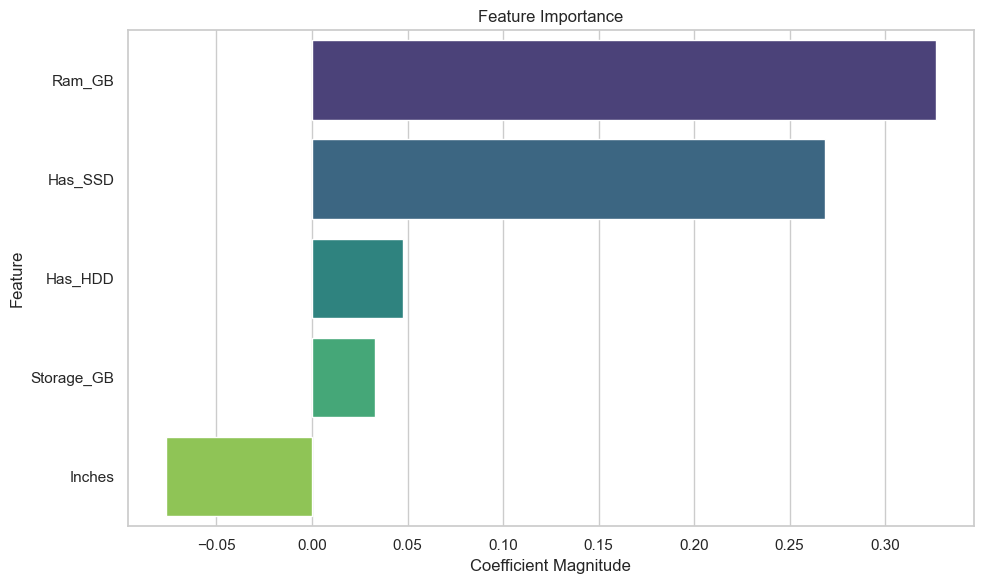


Feature Importance:
      Feature  Coefficient
0      Ram_GB     0.326425
2     Has_SSD     0.268532
3     Has_HDD     0.047403
1  Storage_GB     0.032893
4      Inches    -0.076313


In [14]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as ticker

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Fungsi formatter harga untuk mata uang Rupee India
def price_formatter(x, pos):
    if x >= 100000:
        return f'₹{x/100000:.1f}L'  # Format Lakh untuk harga tinggi
    elif x >= 1000:
        return f'₹{x/1000:.0f}K'
    else:
        return f'₹{x:.0f}'

# Load dataset
# !kaggle datasets download -d ganeshmohane/laptop-datacsv
# !unzip laptop-datacsv.zip
df = pd.read_csv('laptop_data.csv')

# === Preprocessing ===
# Ekstrak nilai numerik dari kolom RAM (8GB -> 8)
df['Ram_GB'] = df['Ram'].str.extract(r'(\d+)').astype(int)

# Fungsi untuk ekstrak total kapasitas storage dalam GB
def extract_storage_size(text):
    total_gb = 0
    if isinstance(text, str):
        import re
        sizes = re.findall(r'(\d+)(?:\s*)(GB|TB)', text)
        for size, unit in sizes:
            if unit == 'TB':
                total_gb += int(size) * 1024  # 1 TB = 1024 GB
            else:
                total_gb += int(size)
    return total_gb

# Cek apakah memiliki SSD
def has_ssd(text):
    return 1 if isinstance(text, str) and 'SSD' in text else 0

# Cek apakah memiliki HDD
def has_hdd(text):
    return 1 if isinstance(text, str) and 'HDD' in text else 0

df['Storage_GB'] = df['Memory'].apply(extract_storage_size)
df['Has_SSD'] = df['Memory'].apply(has_ssd)
df['Has_HDD'] = df['Memory'].apply(has_hdd)

# Ekstrak ukuran layar (jika ada)
df['Inches'] = df['Inches'].astype(float)

# Transformasi log pada harga untuk normalisasi
df['Log_Price'] = np.log1p(df['Price'])

# === Mempersiapkan data untuk model ===
# Pilih fitur untuk model
features = ['Ram_GB', 'Storage_GB', 'Has_SSD', 'Has_HDD', 'Inches']

# Siapkan X dan y
X = df[features]
y = df['Log_Price']  # menggunakan log price

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === Model Linear Regression ===
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluasi model (log scale)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log scale): {rmse:.4f}")
print(f"R² Score (log scale): {r2:.4f}")

# Evaluasi model (original scale)
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
r2_orig = r2_score(y_test_orig, y_pred_orig)

print(f"RMSE (original scale): {rmse_orig:.2f}")
print(f"R² Score (original scale): {r2_orig:.4f}")

# === Visualisasi model ===
# 1. Actual vs Predicted (log scale)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Log Price Aktual')
plt.ylabel('Log Price Prediksi')
plt.title('Actual vs Predicted (Log Price)')
plt.tight_layout()
plt.savefig('actual_vs_predicted_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Actual vs Predicted (original scale)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Harga Aktual (₹)')
plt.ylabel('Harga Prediksi (₹)')
plt.title('Actual vs Predicted (Original Price)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))
plt.tight_layout()
plt.savefig('actual_vs_predicted_orig.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Log Price Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Histogram Residual
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribusi Residual')
plt.tight_layout()
plt.savefig('residual_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Feature Importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFeature Importance:")
print(coef_df)

3.1.2 Hasil Model Evaluasi Clustering (K-Means)

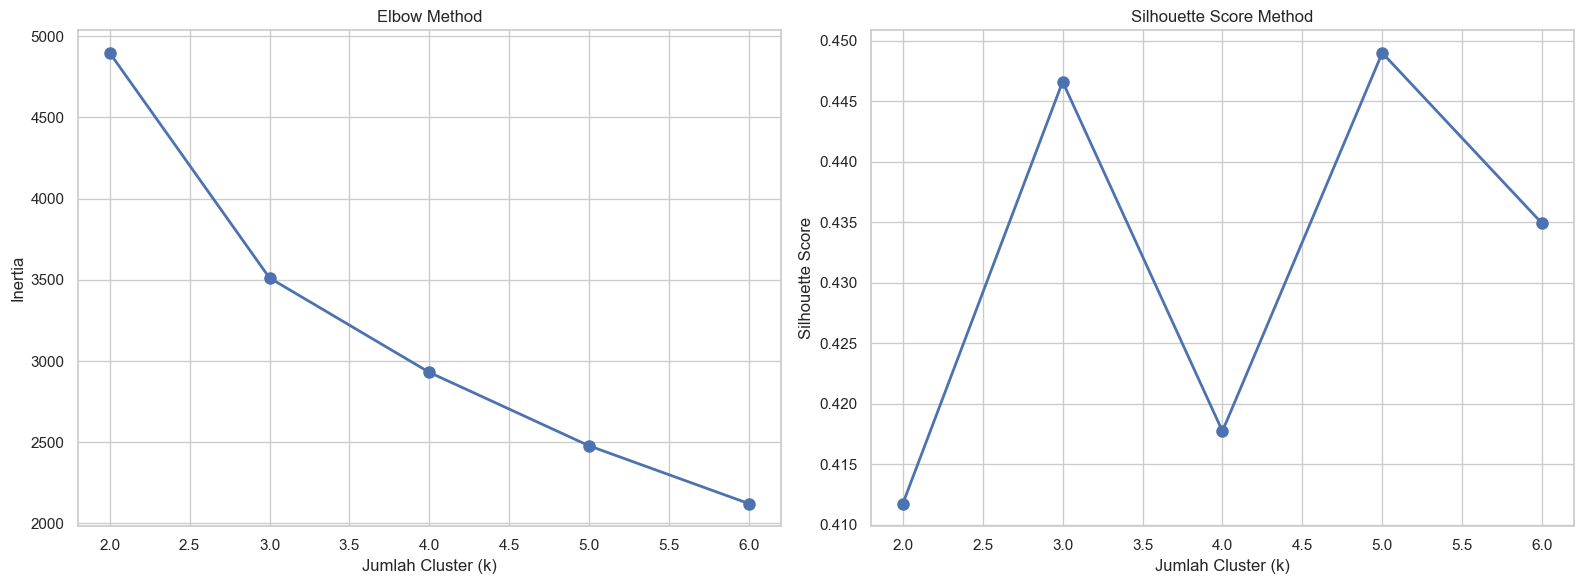

Silhouette Scores for different k:
k=2: 0.4117
k=3: 0.4466
k=4: 0.4177
k=5: 0.4490
k=6: 0.4349


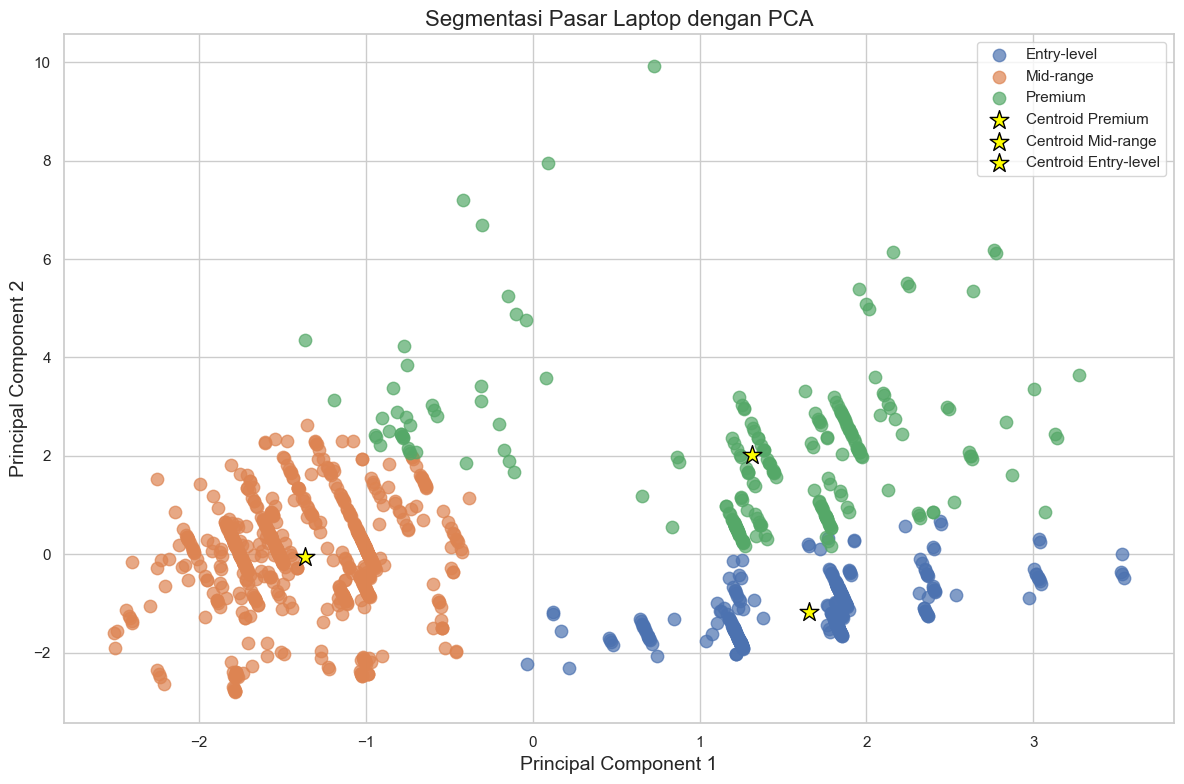


Karakteristik Segmen Pasar:
                Price                            Ram_GB Storage_GB Has_SSD  \
                 mean       min        max count   mean       mean    mean   
Segment                                                                      
Entry-level  34273.98  11934.72  109010.88   375   5.74     877.01    0.01   
Mid-range    60542.76   9270.72  165168.00   687   7.73     256.22    0.88   
Premium      97780.27  38308.32  324954.72   241  14.35    1206.61    0.98   

            Has_HDD Inches  
               mean   mean  
Segment                     
Entry-level    1.00  15.61  
Mid-range      0.00  14.24  
Premium        0.83  16.31  


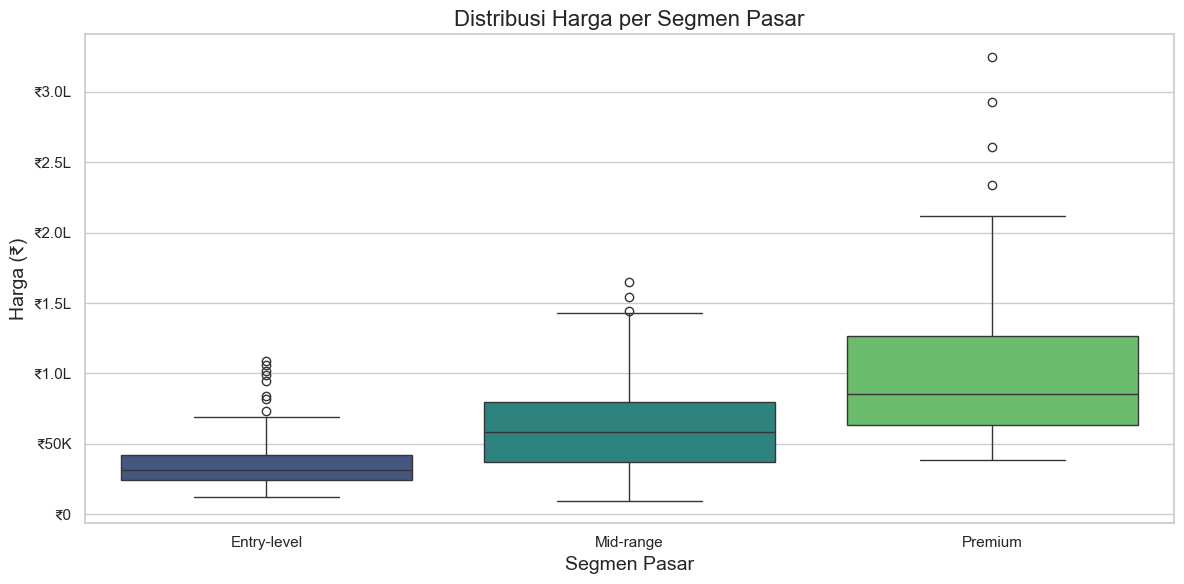

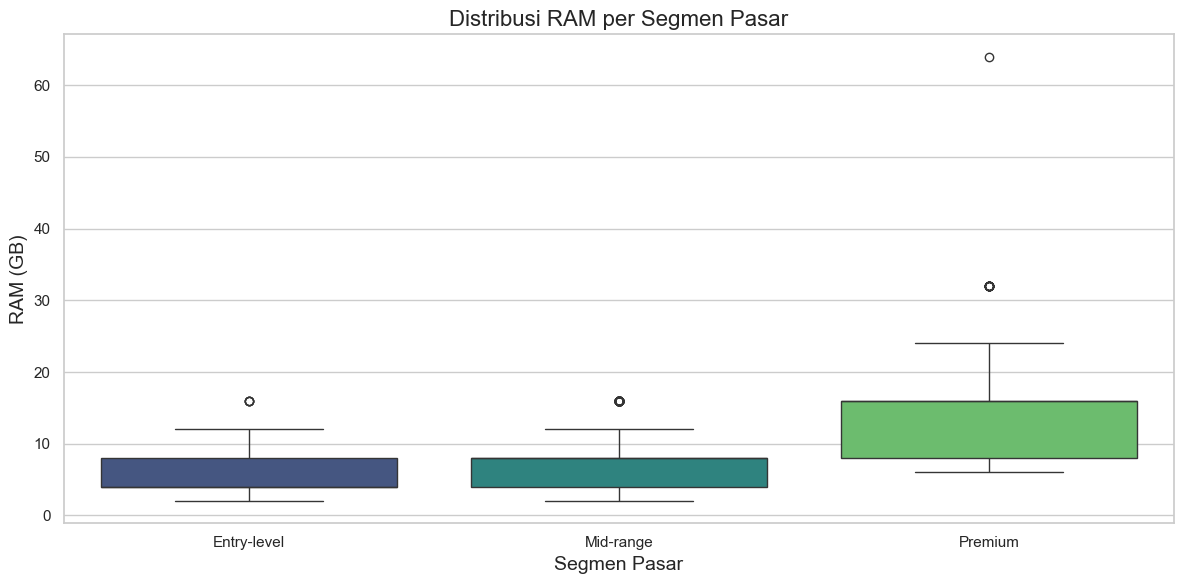

<Figure size 1200x600 with 0 Axes>

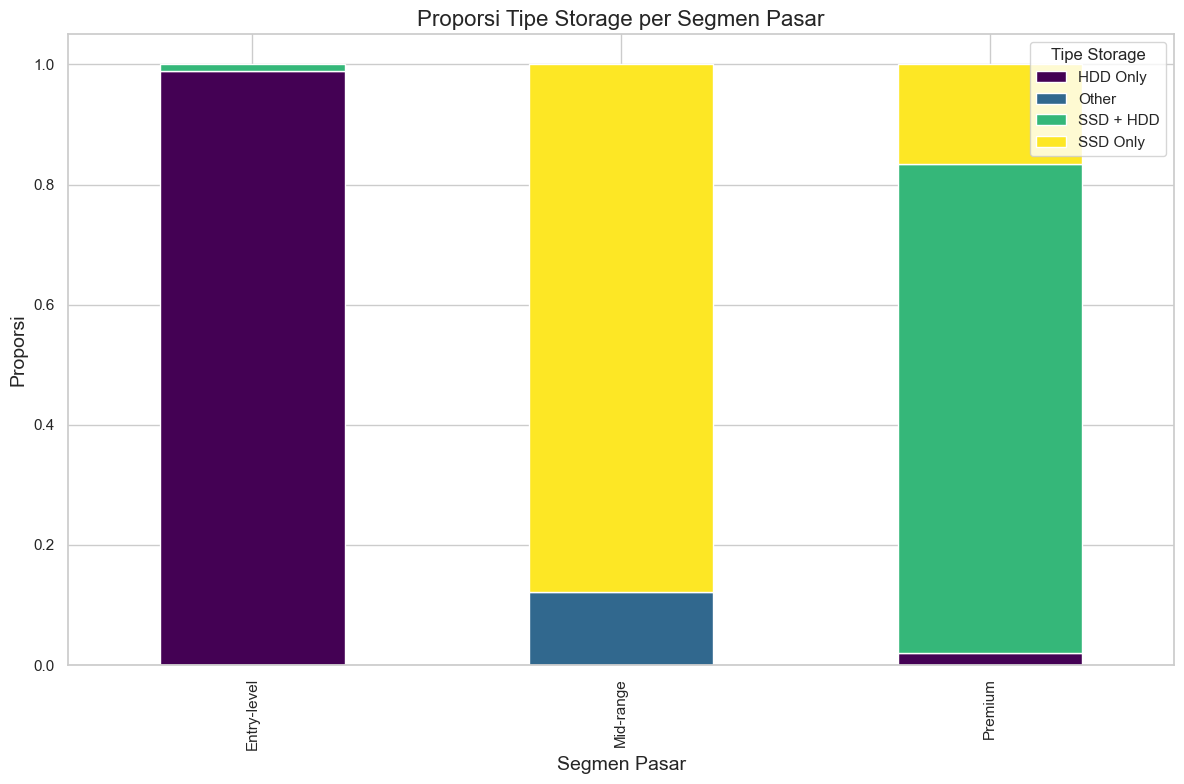

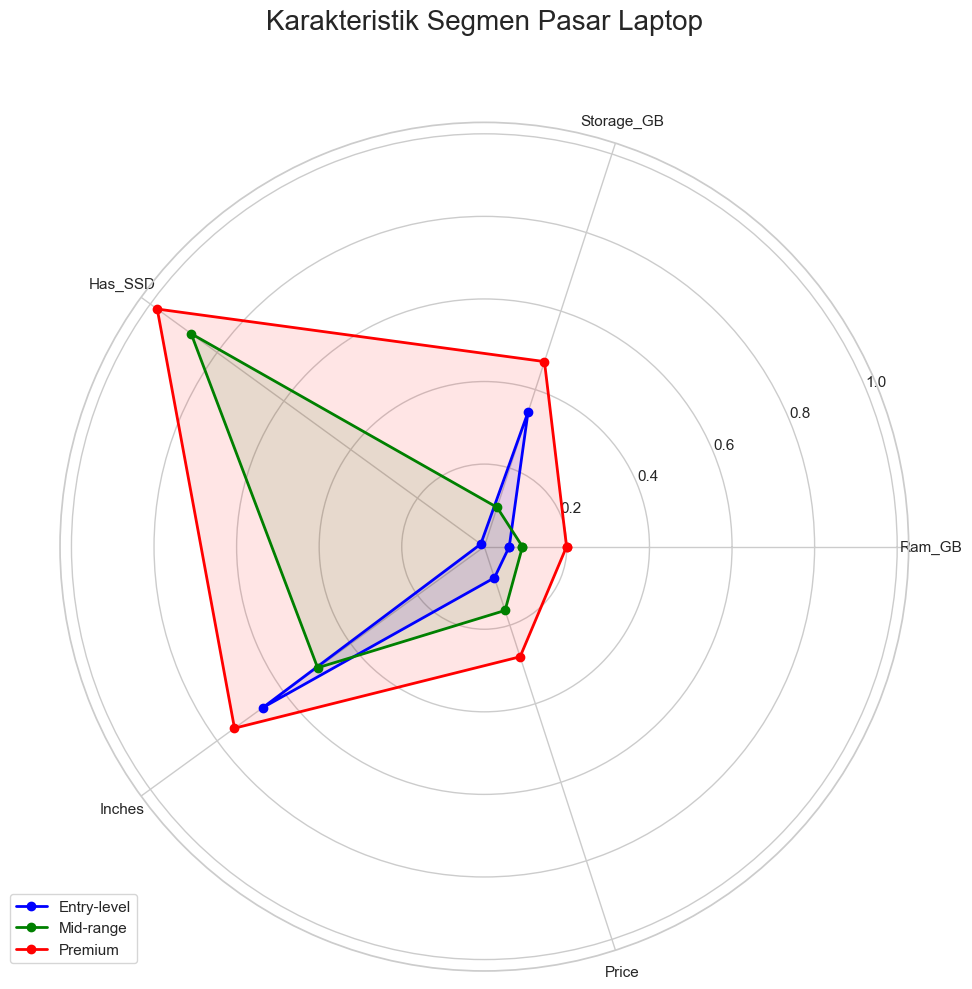

In [15]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.ticker as ticker

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Fungsi formatter harga untuk mata uang Rupee India
def price_formatter(x, pos):
    if x >= 100000:
        return f'₹{x/100000:.1f}L'  # Format Lakh untuk harga tinggi
    elif x >= 1000:
        return f'₹{x/1000:.0f}K'
    else:
        return f'₹{x:.0f}'

# Load dataset
# !kaggle datasets download -d ganeshmohane/laptop-datacsv
# !unzip laptop-datacsv.zip
df = pd.read_csv('laptop_data.csv')

# === Preprocessing ===
# Sama seperti kode sebelumnya
df['Ram_GB'] = df['Ram'].str.extract(r'(\d+)').astype(int)

def extract_storage_size(text):
    total_gb = 0
    if isinstance(text, str):
        import re
        sizes = re.findall(r'(\d+)(?:\s*)(GB|TB)', text)
        for size, unit in sizes:
            if unit == 'TB':
                total_gb += int(size) * 1024  # 1 TB = 1024 GB
            else:
                total_gb += int(size)
    return total_gb

def has_ssd(text):
    return 1 if isinstance(text, str) and 'SSD' in text else 0

def has_hdd(text):
    return 1 if isinstance(text, str) and 'HDD' in text else 0

df['Storage_GB'] = df['Memory'].apply(extract_storage_size)
df['Has_SSD'] = df['Memory'].apply(has_ssd)
df['Has_HDD'] = df['Memory'].apply(has_hdd)

df['Inches'] = df['Inches'].astype(float)

# Tambahan: Kategori Storage
def get_storage_type(row):
    if row['Has_SSD'] == 1 and row['Has_HDD'] == 1:
        return 'SSD + HDD'
    elif row['Has_SSD'] == 1:
        return 'SSD Only'
    elif row['Has_HDD'] == 1:
        return 'HDD Only'
    else:
        return 'Other'

df['Storage_Type'] = df.apply(get_storage_type, axis=1)

# === Persiapan data untuk clustering ===
# Pilih fitur untuk clustering
cluster_features = ['Ram_GB', 'Storage_GB', 'Has_SSD', 'Has_HDD', 'Price', 'Inches']

# Filter data
df_cluster = df[cluster_features].copy()

# Standardisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# === Menentukan jumlah cluster optimal ===
# Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)
plt.tight_layout()
plt.savefig('optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Print silhouette scores
print("Silhouette Scores for different k:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

# === Implementasi K-Means dengan k=3 ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

# Tambahkan label cluster ke dataframe
df['Cluster'] = cluster_labels

# Beri nama segmen berdasarkan harga rata-rata
cluster_stats = df.groupby('Cluster')['Price'].mean().sort_values()
cluster_names = {
    cluster_stats.index[0]: "Entry-level",
    cluster_stats.index[1]: "Mid-range",
    cluster_stats.index[2]: "Premium"
}

df['Segment'] = df['Cluster'].map(cluster_names)

# === Visualisasi cluster dengan PCA ===
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot cluster
plt.figure(figsize=(12, 8))
for segment, color in zip(['Entry-level', 'Mid-range', 'Premium'], ['blue', 'green', 'red']):
    plt.scatter(
        df[df['Segment'] == segment]['PCA1'],
        df[df['Segment'] == segment]['PCA2'],
        s=80, alpha=0.7, label=segment
    )

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids_pca):
    segment = cluster_names[i] if i in cluster_names else f"Cluster {i}"
    plt.scatter(
        centroid[0], centroid[1],
        s=200, marker='*', c='yellow', edgecolor='black',
        label=f'Centroid {segment}'
    )

plt.title('Segmentasi Pasar Laptop dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# === Karakteristik per segmen ===
# Statistik per cluster
print("\nKarakteristik Segmen Pasar:")
segment_stats = df.groupby('Segment')[cluster_features].agg({
    'Price': ['mean', 'min', 'max', 'count'],
    'Ram_GB': 'mean',
    'Storage_GB': 'mean',
    'Has_SSD': 'mean',
    'Has_HDD': 'mean',
    'Inches': 'mean'
}).round(2)

print(segment_stats)

# Visualisasi karakteristik per segmen
# 1. Distribusi harga per segmen
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Price', data=df, order=['Entry-level', 'Mid-range', 'Premium'], palette='viridis')
plt.title('Distribusi Harga per Segmen Pasar', fontsize=16)
plt.xlabel('Segmen Pasar', fontsize=14)
plt.ylabel('Harga (₹)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))
plt.tight_layout()
plt.savefig('price_per_segment.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Distribusi RAM per segmen
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Ram_GB', data=df, order=['Entry-level', 'Mid-range', 'Premium'], palette='viridis')
plt.title('Distribusi RAM per Segmen Pasar', fontsize=16)
plt.xlabel('Segmen Pasar', fontsize=14)
plt.ylabel('RAM (GB)', fontsize=14)
plt.tight_layout()
plt.savefig('ram_per_segment.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Proporsi SSD vs HDD per segmen
segment_storage = df.groupby('Segment')['Storage_Type'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(12, 6))
segment_storage.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proporsi Tipe Storage per Segmen Pasar', fontsize=16)
plt.xlabel('Segmen Pasar', fontsize=14)
plt.ylabel('Proporsi', fontsize=14)
plt.legend(title='Tipe Storage')
plt.tight_layout()
plt.savefig('storage_per_segment.png', dpi=300, bbox_inches='tight')
plt.show()

# Tambahan: Radar chart karakteristik per segmen
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, features, segment_col, segments, title):
    # Jumlah fitur
    N = len(features)

    # Sudut untuk setiap fitur
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Tutup polygon

    # Inisialisasi figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Warna untuk setiap segmen
    colors = ['blue', 'green', 'red']

    # Plot untuk setiap segmen
    for i, segment in enumerate(segments):
        # Ambil data untuk segmen ini
        segment_data = df[df[segment_col] == segment][features].mean().values

        # Normalisasi data (0-1)
        segment_data = (segment_data - df[features].min().values) / (df[features].max().values - df[features].min().values)

        # Tutup polygon
        segment_data = np.append(segment_data, segment_data[0])

        # Plot
        ax.plot(angles, segment_data, 'o-', linewidth=2, color=colors[i], label=segment)
        ax.fill(angles, segment_data, color=colors[i], alpha=0.1)

    # Set y ticks
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])

    # Set feature labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title(title, size=20, y=1.1)
    plt.tight_layout()
    plt.savefig('segment_radar.png', dpi=300, bbox_inches='tight')
    plt.show()

# Radar chart
radar_features = ['Ram_GB', 'Storage_GB', 'Has_SSD', 'Inches', 'Price']
radar_chart(df, radar_features, 'Segment', ['Entry-level', 'Mid-range', 'Premium'], 'Karakteristik Segmen Pasar Laptop')

# Dashboard name -> app.py

In [ ]:
# === Import Library ===
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split

# === Konfigurasi Halaman ===
st.set_page_config(layout="wide", page_title="Analisis Pasar Laptop India")

# === Fungsi Formatter Harga ===
def price_formatter(price):
    if price >= 100000:
        return f'₹{price/100000:.2f} Lakh'
    elif price >= 1000:
        return f'₹{price/1000:.1f}K'
    else:
        return f'₹{price:.0f}'

# === STREAMLIT APP LAYOUT ===
st.title("💻 Dashboard Analisis Pasar Laptop India")

# Sidebar
st.sidebar.title("Menu Dashboard")

# === File Upload ===
uploaded_file = st.sidebar.file_uploader("📂 Unggah File CSV Dataset Laptop", type=["csv"])

# Variabel untuk melacak status data
data_processed = False

# === Data Processing ===
if uploaded_file is not None:
    try:
        # Baca data
        df = pd.read_csv(uploaded_file)
        st.sidebar.success("✅ File berhasil diunggah!")

        # === Data Preparation ===
        # Hapus duplikat
        df = df.drop_duplicates()

        # Handle missing values
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                if df[col].dtype == 'object':
                    df[col].fillna(df[col].mode()[0], inplace=True)
                else:
                    df[col].fillna(df[col].median(), inplace=True)

        # Feature Engineering (jika kolom tertentu ada)
        if 'Ram' in df.columns and 'Ram_GB' not in df.columns:
            # Extract RAM in GB (menggunakan raw string untuk regex)
            df['Ram_GB'] = df['Ram'].str.extract(r'(\d+)').astype(int)

        if 'Memory' in df.columns:
            # Extract storage info
            if 'Storage_GB' not in df.columns:
                def extract_storage_size(text):
                    total_gb = 0
                    if isinstance(text, str):
                        import re
                        sizes = re.findall(r'(\d+)(?:\s*)(GB|TB)', text)
                        for size, unit in sizes:
                            if unit == 'TB':
                                total_gb += int(size) * 1024  # 1 TB = 1024 GB
                            else:
                                total_gb += int(size)
                    return total_gb

                df['Storage_GB'] = df['Memory'].apply(extract_storage_size)

            if 'Has_SSD' not in df.columns:
                df['Has_SSD'] = df['Memory'].apply(lambda x: 1 if isinstance(x, str) and 'SSD' in x else 0)

            if 'Has_HDD' not in df.columns:
                df['Has_HDD'] = df['Memory'].apply(lambda x: 1 if isinstance(x, str) and 'HDD' in x else 0)

        # Label Encoding
        label_encoders = {}
        for col in df.select_dtypes(include='object'):
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le

        # Log transform Price for better modeling
        if 'Price' in df.columns:
            df['Log_Price'] = np.log1p(df['Price'])

            # Feature & Target
            X = df.drop(['Price', 'Log_Price'], axis=1)
            y = df['Price']
            y_log = df['Log_Price']

            # Standardization
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            # Split Data
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

            # Linear Regression on Log Price
            lr = LinearRegression()
            lr.fit(X_train, y_train)
            y_pred = lr.predict(X_test)

            # Calculate metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)

            # Convert back to original scale for interpretation
            y_test_orig = np.expm1(y_test)
            y_pred_orig = np.expm1(y_pred)
            rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
            r2_orig = r2_score(y_test_orig, y_pred_orig)

            # KMeans Clustering
            kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
            df['Cluster'] = kmeans.fit_predict(X_scaled)
            sil_score = silhouette_score(X_scaled, df['Cluster'])

            # PCA
            pca = PCA(n_components=2)
            pca_result = pca.fit_transform(X_scaled)
            df['PCA1'] = pca_result[:, 0]
            df['PCA2'] = pca_result[:, 1]

            # Get cluster names
            cluster_stats = df.groupby('Cluster')['Price'].mean().sort_values()
            cluster_names = {
                cluster_stats.index[0]: "Entry-level",
                cluster_stats.index[1]: "Mid-range",
                cluster_stats.index[2]: "Premium"
            }
            df['Segment'] = df['Cluster'].map(cluster_names)

            # Tandai bahwa data telah diproses
            data_processed = True
        else:
            st.error("❌ Dataset harus memiliki kolom 'Price'. Silakan unggah dataset yang sesuai.")
            data_processed = False

    except Exception as e:
        st.error(f"❌ Error dalam pemrosesan data: {e}")
        data_processed = False

# === Menu Selection ===
menu = st.sidebar.radio("📌 Menu", [
    "🏠 Business Understanding",
    "📊 Data Exploration",
    "📈 Prediksi Harga",
    "🧩 Clustering",
    "🧪 Simulasi Data Baru",
    "📑 Kesimpulan & Rekomendasi"
])

# === Business Understanding (selalu ditampilkan) ===
if menu == "🏠 Business Understanding":
    st.header("🏢 Business Understanding")

    st.markdown("""
    <div style='background-color:#f0f2f6;padding:15px;border-radius:10px;'>
    <h3>Tujuan Bisnis:</h3>
    <p>Menganalisis pasar laptop India untuk mengidentifikasi segmentasi pasar, faktor-faktor yang memengaruhi harga, dan peluang potensial bagi vendor untuk strategi penetapan harga dan pengembangan produk yang optimal.</p>
    </div>
    """, unsafe_allow_html=True)

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Objektif Bisnis")
        st.markdown("""
        1. **Memahami segmentasi pasar laptop India** berdasarkan karakteristik teknis dan harga
        2. **Mengidentifikasi faktor-faktor utama** yang memengaruhi harga laptop di pasar India
        3. **Mengembangkan model prediksi harga** untuk membantu penetapan harga kompetitif
        4. **Merekomendasikan strategi pemasaran** yang sesuai dengan segmen pasar yang teridentifikasi
        """)

    with col2:
        st.subheader("Pertanyaan Bisnis")
        st.markdown("""
        1. **Segmentasi Pasar**: Bagaimana struktur segmentasi pasar laptop India berdasarkan spesifikasi dan harga?
        2. **Price Drivers**: Faktor teknis apa yang paling memengaruhi harga laptop di pasar India?
        3. **Brand Premium**: Seberapa besar pengaruh brand terhadap harga di berbagai segmen?
        4. **Competitive Pricing**: Bagaimana menentukan harga optimal untuk spesifikasi tertentu?
        5. **Market Gap**: Adakah segmen pasar yang belum terlayani dengan baik (underserved)?
        """)

    st.subheader("Latar Belakang Pasar")
    st.write("""
    Pasar laptop India mengalami pertumbuhan pesat dengan CAGR 15.4% selama 2018-2023, mencapai valuasi $7.5 miliar pada 2023.
    Pertumbuhan ini didorong oleh meningkatnya penetrasi internet, inisiatif Digital India, dan kebutuhan akan perangkat computing yang terjangkau
    namun mampu mendukung produktivitas dan entertainment.
    """)

    st.subheader("Metodologi Analisis")
    st.write("""
    Analisis menggunakan pendekatan dua model:
    1. **Supervised Learning (Linear Regression)**: Memprediksi harga laptop berdasarkan spesifikasi teknis
    2. **Unsupervised Learning (K-Means Clustering)**: Segmentasi pasar berdasarkan karakteristik laptop
    """)

# === Menu 2: Data Exploration ===
elif menu == "📊 Data Exploration":
    st.header("📊 Data Exploration & Understanding")

    if data_processed:
        tab1, tab2, tab3 = st.tabs(["📋 Overview", "📊 Distribusi", "🔄 Korelasi"])

        with tab1:
            st.subheader("📌 Dataset Overview")

            col1, col2 = st.columns(2)

            with col1:
                st.write("**5 Data Teratas:**")
                st.dataframe(df.head())

            with col2:
                st.write("**Struktur Data:**")
                st.text(f"Jumlah baris: {df.shape[0]}  |  Jumlah kolom: {df.shape[1]}")
                st.write("Tipe data per kolom:")
                st.write(df.dtypes)

            st.subheader("📉 Statistik Deskriptif")
            st.write(df.describe())

            st.subheader("🧩 Cek Duplikat & Missing Values")
            st.write(f"Jumlah duplikat: {df.duplicated().sum()}")
            st.write("Jumlah missing value per kolom:")
            st.write(df.isnull().sum())

        with tab2:
            st.subheader("🔍 Distribusi Harga")

            col1, col2 = st.columns(2)

            with col1:
                fig, ax = plt.subplots(figsize=(10, 6))
                sns.histplot(df['Price'], kde=True, bins=25, color='navy', ax=ax)
                ax.set_title('Distribusi Harga Laptop', fontsize=14)
                ax.set_xlabel('Harga (₹)', fontsize=12)
                st.pyplot(fig)

                st.markdown("""
                **Insight:**
                - Distribusi harga positively skewed dengan konsentrasi di segmen entry dan mid-range
                - Terlihat 3 kelompok harga: entry-level, mid-range, dan premium
                - Terdapat outlier di segmen ultra-premium
                """)

            with col2:
                fig, ax = plt.subplots(figsize=(10, 6))
                sns.boxplot(y=df['Price'], color='navy', ax=ax)
                ax.set_title('Box Plot Harga Laptop', fontsize=14)
                ax.set_ylabel('Harga (₹)', fontsize=12)
                st.pyplot(fig)

                # Price stats
                price_stats = df['Price'].describe()
                st.markdown(f"""
                **Statistik Harga:**
                - **Minimum:** {price_formatter(price_stats['min'])}
                - **Q1 (25%):** {price_formatter(price_stats['25%'])}
                - **Median:** {price_formatter(price_stats['50%'])}
                - **Q3 (75%):** {price_formatter(price_stats['75%'])}
                - **Maximum:** {price_formatter(price_stats['max'])}
                - **Mean:** {price_formatter(price_stats['mean'])}
                """)

        with tab3:
            st.subheader("📊 Korelasi Antar Fitur")

            # Pilih hanya kolom numerik untuk korelasi
            numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

            fig, ax = plt.subplots(figsize=(12, 8))
            sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=ax)
            ax.set_title('Heatmap Korelasi Antar Variabel', fontsize=14)
            st.pyplot(fig)

            # Korelasi dengan harga
            if 'Price' in numeric_cols:
                price_corr = df[numeric_cols].corr()['Price'].sort_values(ascending=False)
                st.write("**Korelasi dengan Harga:**")
                st.write(price_corr)

                st.markdown("""
                **Insight Korelasi:**
                - **RAM** memiliki korelasi tertinggi dengan harga, menunjukkan ini faktor teknis terpenting
                - **SSD** berkorelasi positif kuat, HDD berkorelasi negatif - menandakan preferensi konsumen terhadap SSD
                - **Storage capacity** kurang berpengaruh dibandingkan tipe storage

                **Implikasi Bisnis:**
                - Strategi pricing sebaiknya memprioritaskan RAM dan tipe storage sebagai faktor utama
                - SSD dapat menjadi fitur diferensiasi utama di segmen mid-range
                """)
    else:
        st.info("📂 Silakan unggah file dataset terlebih dahulu untuk melihat eksplorasi data.")

# === Menu 3: Regression ===
elif menu == "📈 Prediksi Harga":
    st.header("📈 Model Prediksi Harga Laptop")

    if data_processed:
        # Display metrics
        col1, col2 = st.columns(2)

        with col1:
            st.metric("RMSE (pada log harga)", f"{rmse:.4f}")
            st.metric("R² Score", f"{r2:.4f}")

        with col2:
            st.metric("RMSE (harga asli)", f"₹{rmse_orig:.2f}")
            st.metric("R² Score (harga asli)", f"{r2_orig:.4f}")

        # Actual vs Predicted
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        ax.set_title("Actual vs. Predicted (Log Price)", fontsize=14)
        ax.set_xlabel("Log Price Aktual", fontsize=12)
        ax.set_ylabel("Log Price Prediksi", fontsize=12)
        ax.grid(True, alpha=0.3)
        st.pyplot(fig)

        # Residual analysis
        residuals = y_test - y_pred

        col1, col2 = st.columns(2)

        with col1:
            # Residual plot
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
            ax.axhline(0, color='red', linestyle='--')
            ax.set_title("Residual Plot", fontsize=14)
            ax.set_xlabel("Prediksi Log Price", fontsize=12)
            ax.set_ylabel("Residual", fontsize=12)
            ax.grid(True, alpha=0.3)
            st.pyplot(fig)

        with col2:
            # Histogram of residuals
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.histplot(residuals, bins=30, kde=True, color='navy', ax=ax)
            ax.set_title("Distribusi Residual", fontsize=14)
            ax.set_xlabel("Residual", fontsize=12)
            ax.grid(True, alpha=0.3)
            st.pyplot(fig)

        # Feature importance
        if hasattr(lr, 'coef_'):
            st.subheader("🏆 Pengaruh Fitur Terhadap Harga")

            coef_df = pd.DataFrame({
                'Feature': X.columns,
                'Coefficient': lr.coef_
            }).sort_values('Coefficient', ascending=False)

            fig, ax = plt.subplots(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='viridis', ax=ax)
            ax.set_title('Top 10 Feature Importance', fontsize=14)
            ax.set_xlabel('Magnitude of Impact on Price', fontsize=12)
            ax.grid(True, alpha=0.3)
            st.pyplot(fig)

            st.markdown("""
            **Insight Feature Importance:**
            - **RAM** adalah prediktor terkuat harga laptop di pasar India
            - **SSD** memberikan premium harga yang signifikan
            - **Brand premium** (jika tersedia dalam dataset) memiliki pengaruh substansial pada segmen high-end

            **Implikasi Bisnis:**
            - Strategi upselling sebaiknya fokus pada peningkatan RAM dan penambahan SSD
            - Peningkatan kapasitas storage kurang efektif dibanding upgrade tipe storage
            - Perlu mempertimbangkan nilai brand dalam penetapan harga, terutama di segmen premium
            """)
    else:
        st.info("📂 Silakan unggah file dataset terlebih dahulu untuk melihat model prediksi harga.")

# === Menu 4: Clustering ===
elif menu == "🧩 Clustering":
    st.header("🧩 Segmentasi Pasar Laptop")

    if data_processed:
        st.metric("Silhouette Score", f"{sil_score:.3f}",
                 help="Silhouette score mengukur seberapa baik cluster terpisah. Nilai mendekati 1 menunjukkan separasi yang baik.")

        # Visualize clusters
        fig, ax = plt.subplots(figsize=(10, 6))
        scatter = sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Segment', palette='viridis', s=70, alpha=0.7, ax=ax)

        # Add centroids
        centroids_pca = pca.transform(kmeans.cluster_centers_)
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, marker='*',
                   c='red', edgecolor='k', label='Centroids')

        ax.set_title('Visualisasi Segmen Pasar dengan PCA', fontsize=14)
        ax.set_xlabel('Principal Component 1', fontsize=12)
        ax.set_ylabel('Principal Component 2', fontsize=12)
        ax.legend(title='Segmen Pasar')
        st.pyplot(fig)

        # Cluster statistics
        st.subheader("📊 Karakteristik Segmen Pasar")

        # Show relevant features per cluster
        relevant_features = ['Price', 'Ram_GB', 'Storage_GB', 'Has_SSD', 'Has_HDD']
        if 'Inches' in df.columns:
            relevant_features.append('Inches')

        # Ensure all required columns exist
        available_features = [col for col in relevant_features if col in df.columns]

        # Calculate segment statistics
        segment_stats = df.groupby('Segment')[available_features].mean().round(2)

        # Add count of laptops per segment
        segment_counts = df['Segment'].value_counts()
        segment_stats['Count'] = segment_counts

        st.dataframe(segment_stats)

        # Cluster interpretation
        st.subheader("🧠 Interpretasi Segmen")

        st.markdown("""
        **Segmentasi Pasar Laptop India:**

        **1. Entry-level (Budget Segment):**
        - RAM ~4GB, mayoritas HDD, harga terjangkau
        - Target: Pelajar, first-time buyers, basic computing
        - Price Range: ₹10K-₹40K

        **2. Mid-range (Value Segment):**
        - RAM ~8GB, mix SSD & HDD, performa balanced
        - Target: Professionals, small business, daily productivity
        - Price Range: ₹40K-₹70K

        **3. Premium (Performance Segment):**
        - RAM 16GB+, dominan SSD, performa tinggi
        - Target: Power users, gaming, content creation
        - Price Range: ₹70K+

        **Implikasi Bisnis:**
        - Strategi produk dan marketing perlu disesuaikan per segmen
        - Mid-range memiliki potensi pertumbuhan tertinggi di pasar India
        - Premium segment memberikan margin tertinggi tetapi volume lebih kecil
        """)
    else:
        st.info("📂 Silakan unggah file dataset terlebih dahulu untuk melihat segmentasi pasar.")

# === Menu 5: Simulasi Data Baru ===
elif menu == "🧪 Simulasi Data Baru":
    st.header("🧪 Simulasi Prediksi Harga Laptop Baru")

    if data_processed:
        st.write("""
        Gunakan simulator ini untuk memprediksi harga laptop berdasarkan spesifikasi yang dipilih.
        Model ini dapat membantu dalam menentukan strategi penetapan harga yang kompetitif.
        """)

        # Collect input dalam dictionary
        input_values = {}

        # Handle categorical features
        cat_features = [col for col in X.columns if col in label_encoders]
        st.subheader("Spesifikasi Kategorikal")

        # Split into columns
        col1, col2 = st.columns(2)
        half_point = len(cat_features) // 2

        with col1:
            for col in cat_features[:half_point]:
                options = label_encoders[col].classes_.tolist()
                selected = st.selectbox(f"{col}", options)
                input_values[col] = label_encoders[col].transform([selected])[0]

        with col2:
            for col in cat_features[half_point:]:
                options = label_encoders[col].classes_.tolist()
                selected = st.selectbox(f"{col}", options)
                input_values[col] = label_encoders[col].transform([selected])[0]

        # Handle numeric features
        st.subheader("Spesifikasi Numerik")
        num_features = [col for col in X.columns if col not in label_encoders]

        # Divide numeric features into 2 columns
        num_half = len(num_features) // 2
        col1, col2 = st.columns(2)

        with col1:
            for col in num_features[:num_half]:
                mean_val = float(X[col].mean())
                min_val = float(X[col].min())
                max_val = float(X[col].max())
                value = st.number_input(f"{col}", value=mean_val, min_value=min_val, max_value=max_val)
                input_values[col] = value

        with col2:
            for col in num_features[num_half:]:
                mean_val = float(X[col].mean())
                min_val = float(X[col].min())
                max_val = float(X[col].max())
                value = st.number_input(f"{col}", value=mean_val, min_value=min_val, max_value=max_val)
                input_values[col] = value

        # PERBAIKAN: Buat DataFrame dengan kolom yang sama persis seperti X
        # Pastikan semua kolom ada dan dalam urutan yang sama
        input_df = pd.DataFrame(columns=X.columns)
        for col in X.columns:
            if col in input_values:
                input_df.loc[0, col] = input_values[col]
            else:
                input_df.loc[0, col] = 0  # Default value jika kolom tidak ada di input

        # Scale input (sekarang akan bekerja karena kolom input_df sama persis dengan X)
        input_scaled = scaler.transform(input_df)

        # Predict price (log scale)
        log_pred_price = lr.predict(input_scaled)[0]

        # Convert back to original scale
        pred_price = np.expm1(log_pred_price)

        # Display prediction
        st.markdown(f"""
        <div style='background-color:#f0f8ff;padding:20px;border-radius:10px;text-align:center;'>
        <h2>Estimasi Harga Laptop: {price_formatter(pred_price)}</h2>
        </div>
        """, unsafe_allow_html=True)

        # Determine segment
        if pred_price < 40000:
            segment = "Entry-level"
        elif pred_price < 70000:
            segment = "Mid-range"
        else:
            segment = "Premium"

        st.write(f"**Segmen Pasar:** {segment}")

        # Price range suggestion
        lower_bound = max(0, pred_price - 0.1 * pred_price)
        upper_bound = pred_price + 0.1 * pred_price

        st.write(f"**Range Harga Kompetitif:** {price_formatter(lower_bound)} - {price_formatter(upper_bound)}")
    else:
        st.info("📂 Silakan unggah file dataset terlebih dahulu untuk menggunakan simulator prediksi harga.")

# === Menu 6: Conclusion ===
elif menu == "📑 Kesimpulan & Rekomendasi":
    st.header("📑 Kesimpulan & Rekomendasi Bisnis")

    if data_processed:
        col1, col2 = st.columns(2)

        with col1:
            st.subheader("🔍 Key Insights")
            st.markdown("""
            **1. Segmentasi Pasar:**
            - Pasar laptop India terbagi dalam 3 segmen utama: Entry-level, Mid-range, dan Premium
            - Segmen mid-range menunjukkan potensi pertumbuhan tertinggi

            **2. Price Drivers:**
            - RAM adalah faktor teknis terkuat yang memengaruhi harga
            - Keberadaan SSD memberikan premium harga signifikan
            - Brand memiliki pengaruh substansial di segmen premium
            """)

        with col2:
            st.subheader("📋 Rekomendasi Strategis")
            st.markdown("""
            **1. Product Strategy:**
            - Entry-level: 4GB RAM, 500GB storage, fokus affordability
            - Mid-range: 8GB RAM, SSD standard, fokus value-for-money
            - Premium: 16GB+ RAM, SSD, fokus performa dan eksklusivitas

            **2. Pricing Strategy:**
            - Entry-level: Competitive pricing dengan margin 15-20%
            - Mid-range: Value-based pricing dengan margin 20-25%
            - Premium: Premium pricing dengan margin 25-35%
            """)

        st.subheader("🎯 Action Plan")
        st.markdown("""
        1. Implementasikan strategi segmentasi 3-tier untuk optimasi product lineup
        2. Fokus pada value-add di segmen mid-range yang memiliki growth potential tertinggi
        3. Develop premium mid-range sebagai opportunity segment untuk penetrasi pasar
        """)
    else:
        st.info("📂 Silakan unggah file dataset terlebih dahulu untuk melihat kesimpulan dan rekomendasi.")

# Footer (selalu ditampilkan)
st.markdown("""
---
Dashboard ini dikembangkan sebagai bagian dari proyek analisis pasar laptop India.
Data mencakup berbagai spesifikasi dan harga laptop di pasar India.
""")